In [10]:
%pip install pandas
%pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#switch the years to analyze different years

#data = pd.read_csv('c:/Users/estifo/Downloads/gamma-capture-project/data/DAT_ASCII_EURUSD_M1_2010.csv', header=None, sep=';')

In [13]:
import pandas as pd
import os

# Define the file path pattern (adjust if needed)
base_path = r"C:\Users\estifo\OneDrive\Projects\gamma-capture-project\data"

# List to store DataFrames
data_frames = []

# Loop through years 2010 to 2021
for year in range(2000, 2022):
    file_path = os.path.join(base_path, f'DAT_ASCII_EURUSD_M1_{year}.csv')
    
    # Read CSV file (adjust parameters if needed)
    df = pd.read_csv(file_path, header=None, sep=';')
    
    # Append to list
    data_frames.append(df)

# Concatenate all DataFrames into one
data = pd.concat(data_frames, ignore_index=True)

# Display first few rows to confirm
print(data.head())

                 0       1       2       3       4  5
0  20000530 172700  0.9302  0.9302  0.9302  0.9302  0
1  20000530 173500  0.9304  0.9305  0.9304  0.9305  0
2  20000530 173800  0.9304  0.9304  0.9303  0.9303  0
3  20000530 174300  0.9301  0.9301  0.9300  0.9300  0
4  20000530 174400  0.9298  0.9298  0.9297  0.9297  0


In [14]:
data.tail()

,0,1,2,3,4,5
7280970,20211231 165400,1.13797,1.13797,1.13774,1.13774,0
7280971,20211231 165500,1.13775,1.13781,1.13748,1.13748,0
7280972,20211231 165600,1.13749,1.13765,1.13704,1.13707,0
7280973,20211231 165700,1.13709,1.13740,1.13679,1.13740,0
7280974,20211231 165800,1.13740,1.13740,1.13681,1.13686,0


In [15]:
data.shape

(7280975, 6)

In [16]:
# Rename columns for clarity
data.columns = ['DateTime', 'Open', 'High', 'Low', 'Close', 'Volume']

In [17]:
data.tail(4)

,DateTime,Open,High,Low,Close,Volume
7280971,20211231 165500,1.13775,1.13781,1.13748,1.13748,0
7280972,20211231 165600,1.13749,1.13765,1.13704,1.13707,0
7280973,20211231 165700,1.13709,1.13740,1.13679,1.13740,0
7280974,20211231 165800,1.13740,1.13740,1.13681,1.13686,0


In [18]:
# Convert 'DateTime' to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'], format='%Y%m%d %H%M%S')

In [19]:
data.tail()

,DateTime,Open,High,Low,Close,Volume
7280970,2021-12-31 16:54:00,1.13797,1.13797,1.13774,1.13774,0
7280971,2021-12-31 16:55:00,1.13775,1.13781,1.13748,1.13748,0
7280972,2021-12-31 16:56:00,1.13749,1.13765,1.13704,1.13707,0
7280973,2021-12-31 16:57:00,1.13709,1.13740,1.13679,1.13740,0
7280974,2021-12-31 16:58:00,1.13740,1.13740,1.13681,1.13686,0


In [20]:
data.set_index('DateTime', inplace=True)

In [21]:
data

,Open,High,Low,Close,Volume
DateTime,,,,,
2000-05-30 17:27:00,0.93020,0.93020,0.93020,0.93020,0
2000-05-30 17:35:00,0.93040,0.93050,0.93040,0.93050,0
2000-05-30 17:38:00,0.93040,0.93040,0.93030,0.93030,0
2000-05-30 17:43:00,0.93010,0.93010,0.93000,0.93000,0
2000-05-30 17:44:00,0.92980,0.92980,0.92970,0.92970,0
...,...,...,...,...,...
2021-12-31 16:54:00,1.13797,1.13797,1.13774,1.13774,0
2021-12-31 16:55:00,1.13775,1.13781,1.13748,1.13748,0
2021-12-31 16:56:00,1.13749,1.13765,1.13704,1.13707,0


In [22]:
# Ensure 'DateTime' is the index
data.index = pd.to_datetime(data.index)

# Generate a full range of 1-minute timestamps
full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='1T')

C:\Users\estifo\AppData\Local\Temp\ipykernel_31488\4214865167.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='1T')


In [23]:
# Find missing timestamps
missing_timestamps = full_range.difference(data.index)   # Identifies missing timestamps

# Display missing timestamps
print(f"Missing Timestamps:\n{missing_timestamps}")


Missing Timestamps:
DatetimeIndex(['2000-05-30 17:28:00', '2000-05-30 17:29:00',
               '2000-05-30 17:30:00', '2000-05-30 17:31:00',
               '2000-05-30 17:32:00', '2000-05-30 17:33:00',
               '2000-05-30 17:34:00', '2000-05-30 17:36:00',
               '2000-05-30 17:37:00', '2000-05-30 17:39:00',
               ...
               '2021-12-30 23:48:00', '2021-12-31 00:25:00',
               '2021-12-31 00:43:00', '2021-12-31 00:48:00',
               '2021-12-31 00:52:00', '2021-12-31 01:58:00',
               '2021-12-31 02:17:00', '2021-12-31 13:43:00',
               '2021-12-31 14:07:00', '2021-12-31 14:36:00'],
              dtype='datetime64[ns]', length=4073577, freq=None)


In [24]:
data.iloc[35:45]

,Open,High,Low,Close,Volume
DateTime,,,,,
2000-05-30 19:32:00,0.9296,0.9296,0.9296,0.9296,0
2000-05-30 19:33:00,0.9297,0.9297,0.9297,0.9297,0
2000-05-30 19:34:00,0.9296,0.9296,0.9296,0.9296,0
2000-05-30 19:35:00,0.9295,0.9295,0.9295,0.9295,0
2000-05-30 19:36:00,0.9294,0.9294,0.9293,0.9294,0
2000-05-30 19:37:00,0.9293,0.9294,0.9293,0.9293,0
2000-05-30 19:39:00,0.9294,0.9294,0.9294,0.9294,0
2000-05-30 19:42:00,0.9295,0.9295,0.9294,0.9294,0
2000-05-30 19:44:00,0.9295,0.9295,0.9295,0.9295,0


In [25]:
data.iloc[50:60]

,Open,High,Low,Close,Volume
DateTime,,,,,
2000-05-30 19:56:00,0.9297,0.9297,0.9297,0.9297,0
2000-05-30 19:57:00,0.9296,0.9296,0.9295,0.9295,0
2000-05-30 19:58:00,0.9297,0.9299,0.9297,0.9298,0
2000-05-30 19:59:00,0.9299,0.9305,0.9299,0.9305,0
2000-05-30 20:00:00,0.9306,0.9307,0.9306,0.9307,0
2000-05-30 20:01:00,0.9308,0.9308,0.9307,0.9308,0
2000-05-30 20:03:00,0.9307,0.9309,0.9307,0.9309,0
2000-05-30 20:05:00,0.9310,0.9311,0.9310,0.9311,0
2000-05-30 20:06:00,0.9312,0.9312,0.9311,0.9311,0


In [26]:
missing_timestamps.shape

(4073577,)

In [27]:
# Convert missing timestamps to a DataFrame
missing_df = pd.DataFrame(missing_timestamps, columns=['DateTime'])

In [28]:
missing_df['indicator'] = 1
missing_df

,DateTime,indicator
0,2000-05-30 17:28:00,1
1,2000-05-30 17:29:00,1
2,2000-05-30 17:30:00,1
3,2000-05-30 17:31:00,1
4,2000-05-30 17:32:00,1
...,...,...
4073572,2021-12-31 01:58:00,1
4073573,2021-12-31 02:17:00,1
4073574,2021-12-31 13:43:00,1
4073575,2021-12-31 14:07:00,1


In [29]:
# Generate a complete time range with 1-minute frequency
# Instead of data['DateTime'], use data.index to access the DateTime values
full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='T')

C:\Users\estifo\AppData\Local\Temp\ipykernel_31488\2015894820.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='T')


In [30]:
# Create a dataframe from the complete time range
complete_df = pd.DataFrame(full_range, columns=['DateTime'])

# Merge the original dataframe with the complete time range
combined_df = pd.merge(complete_df, data, on='DateTime', how='left')

In [31]:
# Merge the missing dataframe with the combined dataframe
combined_df = pd.merge(combined_df, missing_df, on='DateTime', how='left')

In [32]:
combined_df

,DateTime,Open,High,Low,Close,Volume,indicator
0,2000-05-30 17:27:00,0.93020,0.93020,0.93020,0.93020,0.0,NaN
1,2000-05-30 17:28:00,NaN,NaN,NaN,NaN,NaN,1.0
2,2000-05-30 17:29:00,NaN,NaN,NaN,NaN,NaN,1.0
3,2000-05-30 17:30:00,NaN,NaN,NaN,NaN,NaN,1.0
4,2000-05-30 17:31:00,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...
11354547,2021-12-31 16:54:00,1.13797,1.13797,1.13774,1.13774,0.0,NaN
11354548,2021-12-31 16:55:00,1.13775,1.13781,1.13748,1.13748,0.0,NaN
11354549,2021-12-31 16:56:00,1.13749,1.13765,1.13704,1.13707,0.0,NaN
11354550,2021-12-31 16:57:00,1.13709,1.13740,1.13679,1.13740,0.0,NaN


In [33]:
# Fill the 'indicator' column: 0 for non-missing, 1 for missing
combined_df['indicator'] = combined_df['indicator'].fillna(0).astype(int)

# Sort by DateTime (optional)
combined_df = combined_df.sort_values(by='DateTime').reset_index(drop=True)

In [34]:
combined_df.shape

(11354552, 7)

In [ ]:
#######    EXPLANATORY DATA ANALYSIS   #######

In [ ]:
####   DUPLICATED DATA ANALYSIS  #####

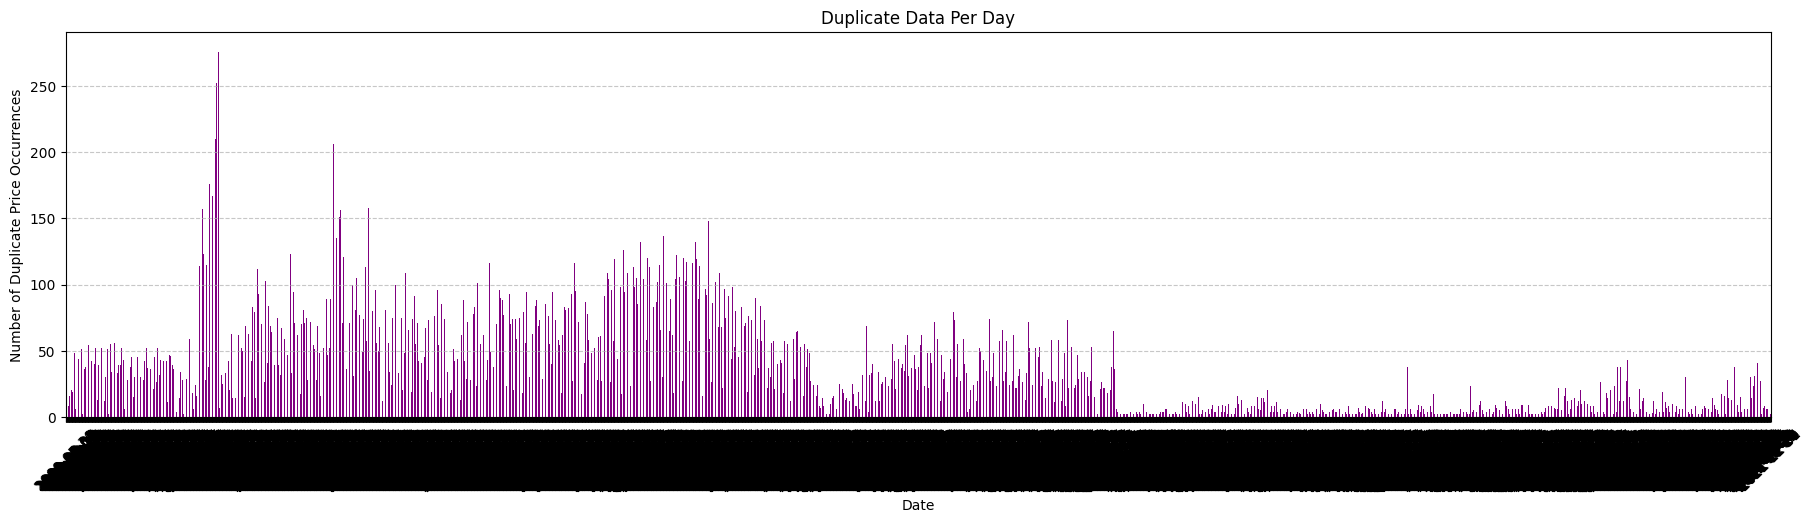

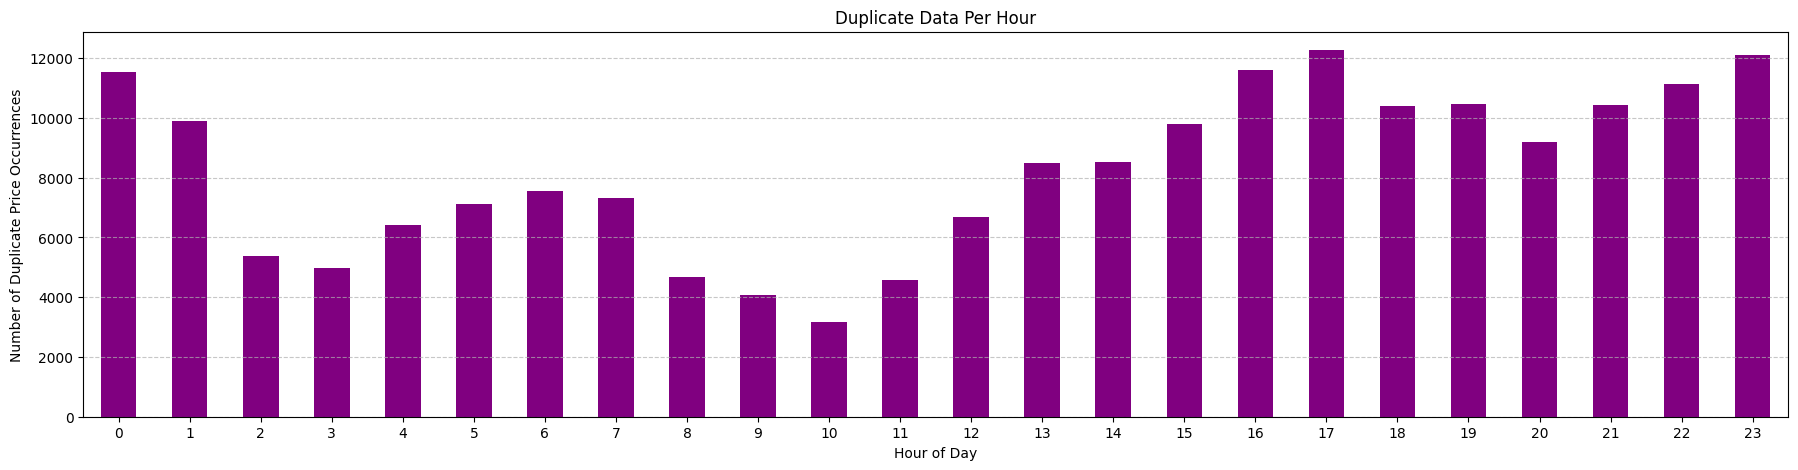

In [96]:
# Ensure DateTime is in datetime format
combined_df['DateTime'] = pd.to_datetime(combined_df['DateTime'])

# Identify duplicated consecutive OHLC prices
dup_consecutive = combined_df[['Open', 'High', 'Low', 'Close']].eq(combined_df[['Open', 'High', 'Low', 'Close']].shift(-1)).all(axis=1) | \
                  combined_df[['Open', 'High', 'Low', 'Close']].eq(combined_df[['Open', 'High', 'Low', 'Close']].shift(1)).all(axis=1)

dup_df = combined_df[dup_consecutive]

# Group duplicate occurrences by date
dup_per_day = dup_df.groupby(dup_df['DateTime'].dt.date).size()

#  Group by hour and count occurrences of duplicate data
dup_per_hour = dup_df.groupby(dup_df['DateTime'].dt.hour).size()

# Plot duplicate occurrences per day
plt.figure(figsize=(22, 5))
dup_per_day.plot(kind='bar', color='purple')
plt.title('Duplicate Data Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Duplicate Price Occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot the bar chart for duplicate data occurrences per hour
plt.figure(figsize=(22, 5))
dup_per_hour.plot(kind='bar', color='purple')
plt.title('Duplicate Data Per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Duplicate Price Occurrences')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\estifo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


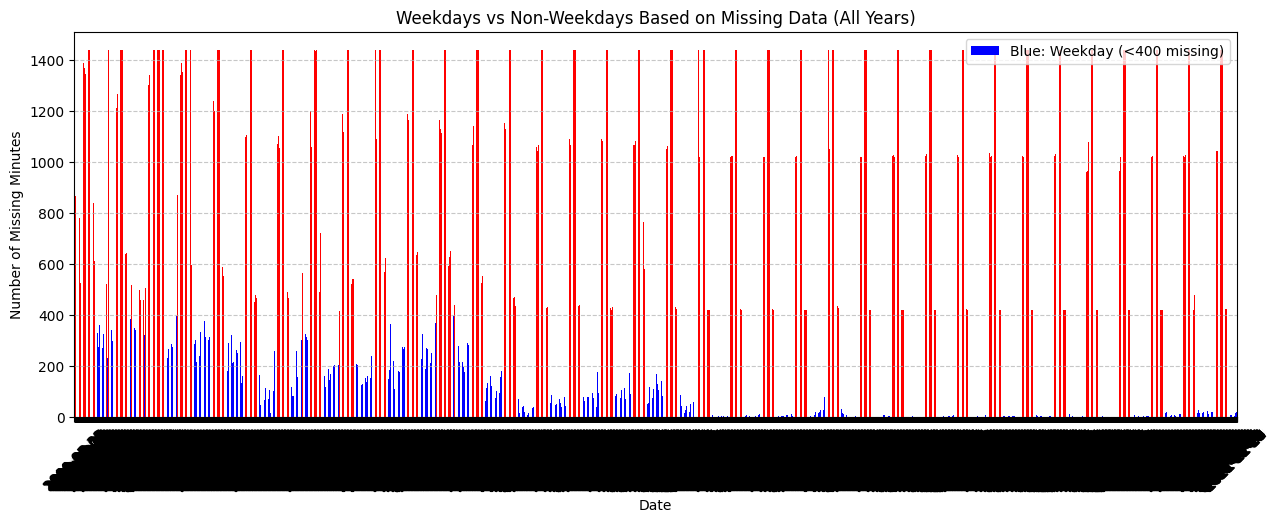

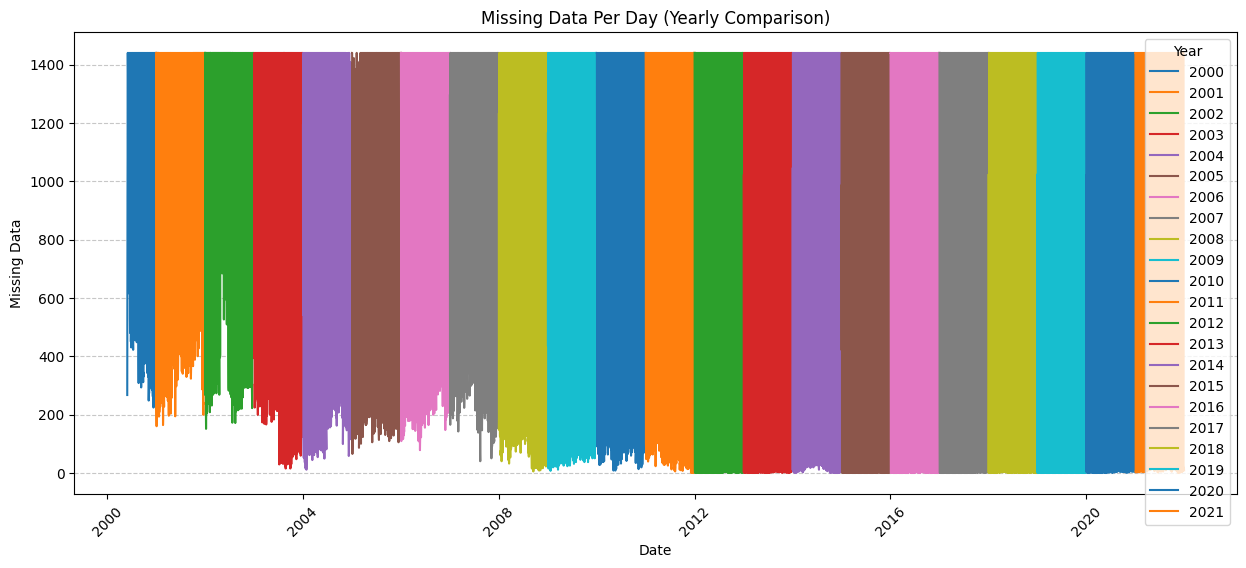

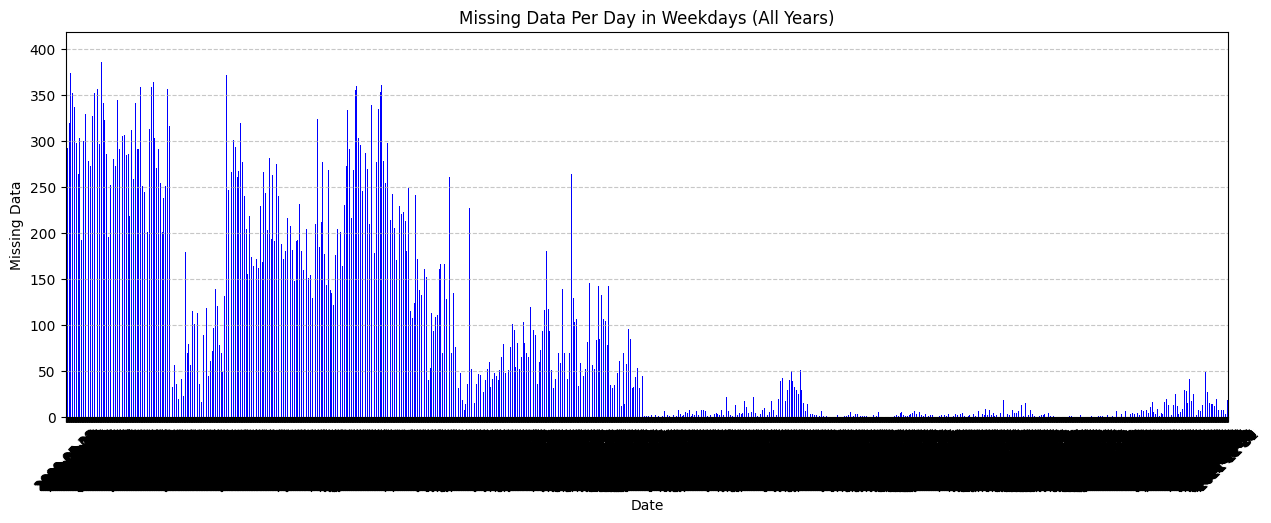

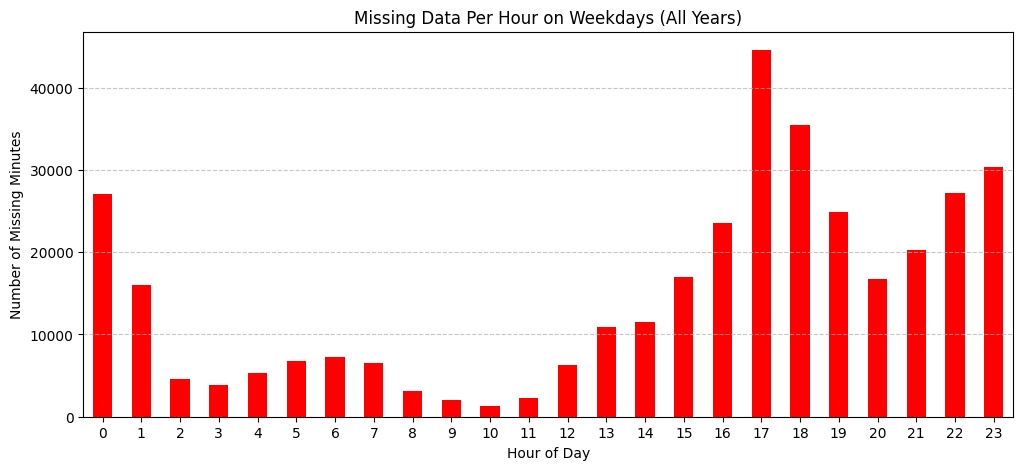

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Ensure DateTime is in datetime format
combined_df['DateTime'] = pd.to_datetime(combined_df['DateTime'])

# Step 1: Group by date and sum the indicator column (missing minutes per day)
missing_per_day = combined_df.groupby(combined_df['DateTime'].dt.date)['indicator'].sum()

# Step 2: Identify weekdays (days with less than 400 missing data)
weekdays = missing_per_day[missing_per_day < 400].index       

# Step 3: Filter the dataframe to include only weekdays
weekday_df = combined_df[combined_df['DateTime'].dt.date.isin(weekdays)]

# Step 4: Group by hour and sum missing data
missing_per_hour_weekdays = weekday_df.groupby(weekday_df['DateTime'].dt.hour)['indicator'].sum()

# Step 5: Add year-wise grouping for better analysis
missing_per_day_yearly = combined_df.groupby([combined_df['DateTime'].dt.year, combined_df['DateTime'].dt.date])['indicator'].sum()

# --- PLOTS ---

# Plot Step 2: Highlighting weekdays (days with missing data < 400)
plt.figure(figsize=(15, 5))
missing_per_day.plot(kind='bar', color=['blue' if date in weekdays else 'red' for date in missing_per_day.index])
plt.title('Weekdays vs Non-Weekdays Based on Missing Data (All Years)')
plt.xlabel('Date')
plt.ylabel('Number of Missing Minutes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(['Blue: Weekday (<400 missing)', 'Red: Non-Weekday (>=400 missing)'])
plt.show()

# OPTIONAL: Yearly Breakdown (Missing Data Per Day)
plt.figure(figsize=(15, 6))
for year in sorted(combined_df['DateTime'].dt.year.unique()):
    missing_per_day_yearly.loc[year].plot(label=str(year))
plt.title('Missing Data Per Day (Yearly Comparison)')
plt.xlabel('Date')
plt.ylabel('Missing Data')
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot Step 3: Missing data per weekday across multiple years
plt.figure(figsize=(15, 5))
weekday_missing_data = missing_per_day[weekdays]
weekday_missing_data.plot(kind='bar', color='blue')
plt.title('Missing Data Per Day in Weekdays (All Years)')
plt.xlabel('Date')
plt.ylabel('Missing Data')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot Step 4: Missing data per hour on weekdays
plt.figure(figsize=(12, 5))
missing_per_hour_weekdays.plot(kind='bar', color='red')
plt.title('Missing Data Per Hour on Weekdays (All Years)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Missing Minutes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [40]:
missing_per_day

DateTime
2000-05-30     267
2000-05-31     822
2000-06-01     944
2000-06-02    1077
2000-06-03    1440
              ... 
2021-12-27      30
2021-12-28      15
2021-12-29      18
2021-12-30      17
2021-12-31       9
Name: indicator, Length: 7886, dtype: int64

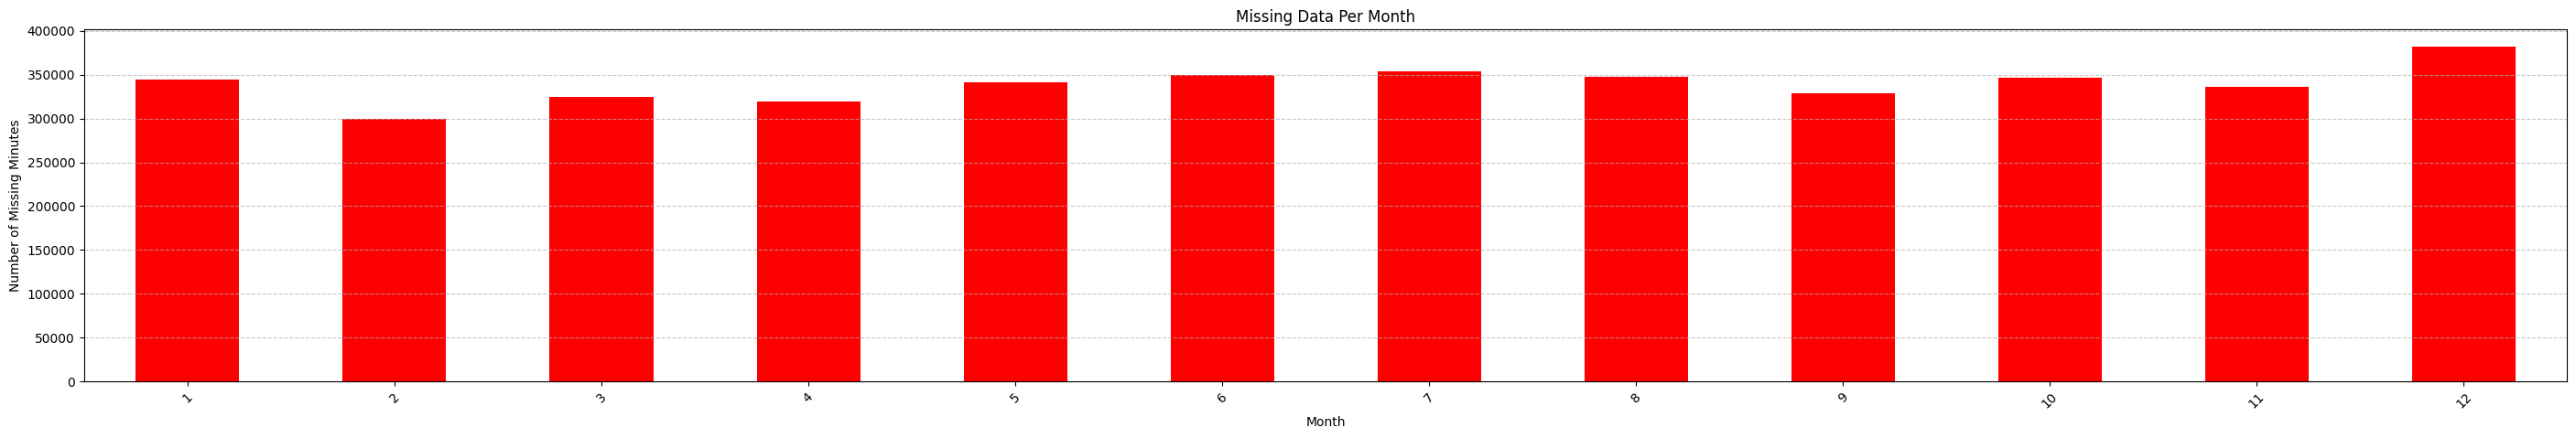

In [41]:
# Group by month and sum the indicator column (missing minutes per month)
missing_per_month = combined_df.groupby(combined_df['DateTime'].dt.month)['indicator'].sum()

# Plot the bar chart
plt.figure(figsize=(35, 5))
missing_per_month.plot(kind='bar', color='red')
plt.title('Missing Data Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Missing Minutes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [42]:
# We expect to have 4 weekends/ mo. Therefore 4*2*24*60 minutes missing per month = 11,520

In [43]:
print(missing_per_month)

DateTime
1     344618
2     299442
3     324297
4     319527
5     340878
6     349312
7     353369
8     347280
9     329058
10    346928
11    336473
12    382395
Name: indicator, dtype: int64


In [44]:
sum(missing_per_month)-(11520*12)

3935337

In [ ]:
dup_consecutive = combined_df[['Open', 'High', 'Low', 'Close']].eq(combined_df[['Open', 'High', 'Low', 'Close']].shift(-1)).all(axis=1) | \
                  combined_df[['Open', 'High', 'Low', 'Close']].eq(combined_df[['Open', 'High', 'Low', 'Close']].shift(1)).all(axis=1)
dup_df= combined_df[dup_consecutive]
dup_df

,DateTime,Open,High,Low,Close,Volume,indicator
110,2000-05-30 19:17:00,0.92980,0.92990,0.92980,0.92990,0.0,0
111,2000-05-30 19:18:00,0.92980,0.92990,0.92980,0.92990,0.0,0
443,2000-05-31 00:50:00,0.93150,0.93150,0.93150,0.93150,0.0,0
444,2000-05-31 00:51:00,0.93150,0.93150,0.93150,0.93150,0.0,0
1077,2000-05-31 11:24:00,0.93100,0.93110,0.93100,0.93100,0.0,0
...,...,...,...,...,...,...,...
11353333,2021-12-30 20:40:00,1.13238,1.13238,1.13237,1.13237,0.0,0
11353374,2021-12-30 21:21:00,1.13193,1.13193,1.13193,1.13193,0.0,0
11353375,2021-12-30 21:22:00,1.13193,1.13193,1.13193,1.13193,0.0,0
11354392,2021-12-31 14:19:00,1.13847,1.13851,1.13847,1.13851,0.0,0


In [49]:
60*5*4*12   # if we assume we have an entire hour of duplicates over a year

14400

In [99]:
# Remove duplicated OHLC data    
combined_df_clean = combined_df[~dup_consecutive]
combined_df_clean

dup_check = combined_df_clean[['Open', 'High', 'Low', 'Close']].eq(combined_df_clean[['Open', 'High', 'Low', 'Close']].shift(-1)).all(axis=1) | \
                  combined_df_clean[['Open', 'High', 'Low', 'Close']].eq(combined_df_clean[['Open', 'High', 'Low', 'Close']].shift(1)).all(axis=1)
dup_check_df = combined_df_clean[dup_check]
dup_check_df.head(20)

# Step 2: Extract only the duplicate rows for review
dup_check_df = combined_df_clean[dup_check]

# Step 3: Remove the left over duplicate OHLC rows 
final_data = combined_df_clean[~dup_check]
final_data

dup_check = final_data[['Open', 'High', 'Low', 'Close']].eq(final_data[['Open', 'High', 'Low', 'Close']].shift(-1)).all(axis=1) | \
                  final_data[['Open', 'High', 'Low', 'Close']].eq(final_data[['Open', 'High', 'Low', 'Close']].shift(1)).all(axis=1)
dup_check_df = final_data[dup_check]
dup_check_df.head(20)

KeyboardInterrupt: 

In [97]:
# Ensure 'DateTime' is the index
combined_df_clean.index = pd.to_datetime(combined_df_clean.index)

<Axes: >

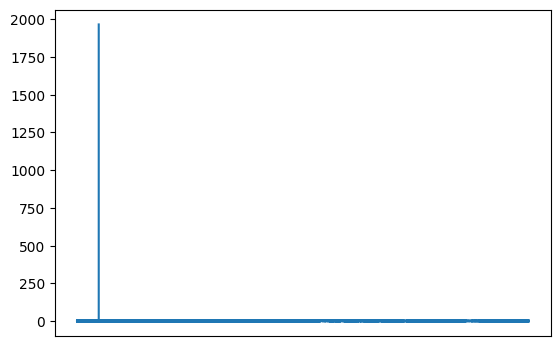

In [ ]:
combined_df_clean['Close'].plot()    ### plot data nicely including years

In [ ]:
final_data

,DateTime,Open,High,Low,Close,Volume,indicator
1970-01-01 00:00:00.000000000,2000-05-30 17:27:00,0.93020,0.93020,0.93020,0.93020,0.0,0
1970-01-01 00:00:00.000000001,2000-05-30 17:28:00,NaN,NaN,NaN,NaN,NaN,1
1970-01-01 00:00:00.000000002,2000-05-30 17:29:00,NaN,NaN,NaN,NaN,NaN,1
1970-01-01 00:00:00.000000003,2000-05-30 17:30:00,NaN,NaN,NaN,NaN,NaN,1
1970-01-01 00:00:00.000000004,2000-05-30 17:31:00,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...
1970-01-01 00:00:00.011354547,2021-12-31 16:54:00,1.13797,1.13797,1.13774,1.13774,0.0,0
1970-01-01 00:00:00.011354548,2021-12-31 16:55:00,1.13775,1.13781,1.13748,1.13748,0.0,0
1970-01-01 00:00:00.011354549,2021-12-31 16:56:00,1.13749,1.13765,1.13704,1.13707,0.0,0
1970-01-01 00:00:00.011354550,2021-12-31 16:57:00,1.13709,1.13740,1.13679,1.13740,0.0,0


In [60]:
data = final_data.copy()

In [61]:
data['Close'].iloc[374920:374950].max()

np.float64(0.9224)

In [62]:
data['Close'].nlargest(n=5)

537485     1965.0001
4273192       1.6038
4273193       1.6033
4273196       1.6031
4273194       1.6030
Name: Close, dtype: float64

In [63]:
max_idx = data['Close'].idxmax()
max_idx

np.int64(537485)

In [64]:
data.loc[max_idx, :] = np.nan

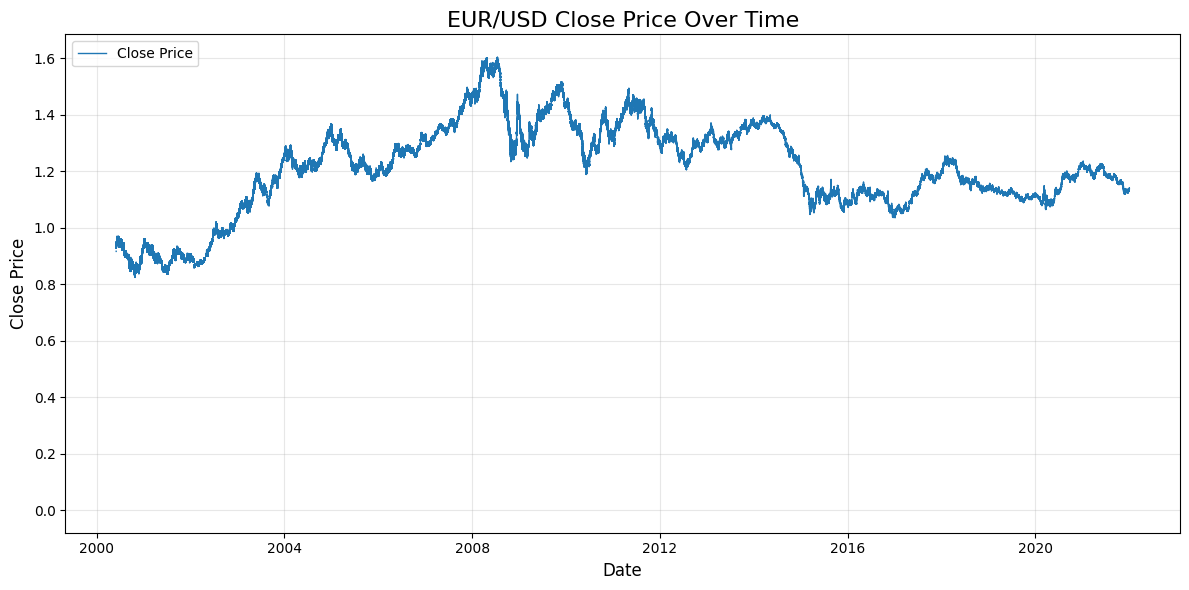

In [65]:

# Plot the 'Close' prices
plt.figure(figsize=(12, 6))
plt.plot(data['DateTime'], data['Close'], label='Close Price', linewidth=1)

# Enhancing the plot aesthetics
plt.title('EUR/USD Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


In [66]:
# Create a column to identify hourly groups
data['Hour'] = pd.to_datetime(data['DateTime']).dt.floor('h').dt.hour
data

,DateTime,Open,High,Low,Close,Volume,indicator,Hour
0,2000-05-30 17:27:00,0.93020,0.93020,0.93020,0.93020,0.0,0.0,17.0
1,2000-05-30 17:28:00,NaN,NaN,NaN,NaN,NaN,1.0,17.0
2,2000-05-30 17:29:00,NaN,NaN,NaN,NaN,NaN,1.0,17.0
3,2000-05-30 17:30:00,NaN,NaN,NaN,NaN,NaN,1.0,17.0
4,2000-05-30 17:31:00,NaN,NaN,NaN,NaN,NaN,1.0,17.0
...,...,...,...,...,...,...,...,...
11354547,2021-12-31 16:54:00,1.13797,1.13797,1.13774,1.13774,0.0,0.0,16.0
11354548,2021-12-31 16:55:00,1.13775,1.13781,1.13748,1.13748,0.0,0.0,16.0
11354549,2021-12-31 16:56:00,1.13749,1.13765,1.13704,1.13707,0.0,0.0,16.0
11354550,2021-12-31 16:57:00,1.13709,1.13740,1.13679,1.13740,0.0,0.0,16.0


In [ ]:
#######   RVOLATILITY CALCULATION   #######

In [69]:
def calculate_rvol(ohlc_data, vol_measure, timeframe, minute_interval):
    """
    Computes realized volatility (rVol) using a selected measure, timeframe, and minute data granularity.

    Parameters:
    - data (pd.DataFrame): A dataframe with 'Open', 'High', 'Low', 'Close' prices indexed by timestamp.
    - vol_measure (str): The volatility measure to use ('Garman-Klass', 'Rogers-Satchell', 'Close-to-Close').
    - timeframe (int): The time window for realized volatility (must be a multiple of 60 minutes).
    - minute_interval (int): The granularity of minute data (1, 5, 10, etc.).

    Returns:
    - rvol_df (pd.DataFrame): A dataframe containing the calculated realized volatility.
    """
    assert timeframe % 60 == 0, "Timeframe must be a multiple of 60 minutes."
    assert minute_interval > 0, "Minute interval must be positive."
    '''
    # Ensure DateTime is set as index and is in datetime format
    data['DateTime'] = pd.to_datetime(data['DateTime'])
    data = data.set_index('DateTime')
    # Step 1: Resample data at the specified `minute_interval` to form proper OHLC bars
    resample_str = f'{minute_interval}T'  # Resampling interval
    ohlc_data = data.resample(resample_str).agg({
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last'
    }).dropna()'''

    # Constants
    k = 2 * np.log(2) - 1  # Constant for Garman-Klass

    # Step 2: Compute volatility measures
    if vol_measure == 'Garman-Klass':
        ohlc_data['V'] = 0.5 * (np.log(ohlc_data['High'] / ohlc_data['Low']) ** 2) - k * (np.log(ohlc_data['Close'] / ohlc_data['Open']) ** 2)
    elif vol_measure == 'Rogers-Satchell':
        ohlc_data['V'] = (np.log(ohlc_data['High'] / ohlc_data['Open']) * np.log(ohlc_data['High'] / ohlc_data['Close']) +
                          np.log(ohlc_data['Low'] / ohlc_data['Open']) * np.log(ohlc_data['Low'] / ohlc_data['Close']))
    elif vol_measure == 'Close-to-Close':
        ohlc_data['Log_Returns'] = np.log(ohlc_data['Close'] / ohlc_data['Close'].shift(1))
        ohlc_data['V'] = ohlc_data['Log_Returns'] ** 2  # Squared log returns for variance
    else:
        raise ValueError("Invalid volatility measure. Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'.")

    # Step 3: Resample based on the specified timeframe
    resample_str_timeframe = f'{timeframe}T'  # 'T' stands for minutes in pandas resampling
    period_counts = ohlc_data.resample(resample_str_timeframe).size()  # Count of data points per timeframe
    rvol_data = ohlc_data.resample(resample_str_timeframe).agg({'V': 'sum'})

    # Adjust by (N-1) for sample variance
    rvol_data['V'] /= (period_counts - 1)

    # Compute realized volatility (square root of variance)
    rvol_data[f'RVol_{timeframe}min_{vol_measure}'] = np.sqrt(rvol_data['V'])

    # Final DataFrame for analysis
    rvol_df = rvol_data[[f'RVol_{timeframe}min_{vol_measure}']]#.dropna()
    rvol_df = rvol_df[rvol_df>0]

    # Step 4: Plot realized volatility as a scatter plot
    plt.figure(figsize=(30, 15))
    plt.scatter(rvol_df.index, rvol_df, label=f'Realized Volatility ({vol_measure}, {timeframe} min)', color='b', alpha=0.7)
    plt.xlabel('Time')
    plt.ylabel('Realized Volatility')
    plt.title(f'Realized Volatility Over Time ({vol_measure}, {timeframe} min)')
    plt.legend()
    plt.grid(True)
    plt.show()

    return rvol_df

In [70]:
def Prepare_data_calc_rvol(data, vol_measure, timeframe, minute_interval, threshold):
    """
    Identifies missing data per resampled timeframe group while considering the minute interval.
    Drops groups where missing data exceeds a specified threshold.

    Parameters:
    - data (pd.DataFrame): A dataframe with 'DateTime' column and OHLC prices.
    - timeframe (int): The time window for resampling (must be a multiple of 60 minutes).
    - minute_interval (int): The granularity of minute data (e.g., 1, 5, 10-minute intervals).
    - threshold (float): The threshold (percentage) of missing data above which the group is dropped.

    Returns:
    - filtered_missing_data_per_group (pd.Series): Series of missing data per timeframe group after filtering.
    - filtered_ohlc_data (pd.DataFrame): The OHLC data grouped into the specified interval, removing groups with excessive missing data.
    """
    assert timeframe % 60 == 0, "Timeframe must be a multiple of 60 minutes."
    assert minute_interval > 0, "Minute interval must be positive."

    # Ensure DateTime is set as index and is in datetime format
    data['DateTime'] = pd.to_datetime(data['DateTime'])
    data = data.set_index('DateTime')
    
    # Step 1: Resample data at the specified `minute_interval` to form proper OHLC bars
    resample_str = f'{minute_interval}T'  # Resampling interval
    ohlc_data = data.resample(resample_str).agg({
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last',
        'Volume': 'sum',
        'indicator': 'sum'  # Sum missing data indicator
    }).dropna()

    # Step 2: Compute expected vs actual counts per timeframe group
    expected_counts = timeframe // minute_interval  # Expected data points per timeframe group
    grouped_counts = ohlc_data.resample(f'{timeframe}T').size()  # Actual data points per group

    # Step 3: Calculate missing data per group (ensure non-negative values)
    missing_data_per_group = (expected_counts - grouped_counts)
    '''
    # Step 4: Plot missing data per group
    plt.figure(figsize=(12, 6))
    missing_data_per_group.plot(kind='bar', color='red', alpha=0.7)
    plt.xlabel('Timeframe Group')
    plt.ylabel('Missing Data Points')
    plt.title(f'Missing Data Points Per {timeframe}-Minute Group (Minute Interval: {minute_interval})')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()'''

    # Step 5: Identify and remove groups where missing data exceeds the threshold
    remove_groups = missing_data_per_group[missing_data_per_group > expected_counts * threshold].index
    filtered_missing_data_per_group = missing_data_per_group.drop(remove_groups)
    
    # Step 6: Remove those groups from the resampled OHLC data
    filtered_ohlc_data = ohlc_data.drop(remove_groups, errors='ignore')
    
    #Step 7: Calculate rvols on the filtered data 
    r_vol = calculate_rvol(filtered_ohlc_data, vol_measure, timeframe, minute_interval)
    r_vol = r_vol.dropna()
    '''
    # Step 8: Plot missing data per group after threshold filtering
    plt.figure(figsize=(12, 6))
    filtered_missing_data_per_group.plot(kind='bar', color='blue', alpha=0.7)
    plt.xlabel('Timeframe Group')
    plt.ylabel('Missing Data Points')
    plt.title(f'Missing Data Points Per {timeframe}-Minute Group (After Threshold Filtering)')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()'''

    return r_vol#missing_data_per_group, filtered_ohlc_data, r_vol

C:\Users\estifo\AppData\Local\Temp\ipykernel_31488\3707363169.py:25: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ohlc_data = data.resample(resample_str).agg({
C:\Users\estifo\AppData\Local\Temp\ipykernel_31488\3707363169.py:36: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  grouped_counts = ohlc_data.resample(f'{timeframe}T').size()  # Actual data points per group
C:\Users\estifo\AppData\Local\Temp\ipykernel_31488\1876677554.py:46: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  period_counts = ohlc_data.resample(resample_str_timeframe).size()  # Count of data points per timeframe
C:\Users\estifo\AppData\Local\Temp\ipykernel_31488\1876677554.py:47: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  rvol_data = ohlc_data.resample(resample_str_timeframe).agg({'V': 'sum'})


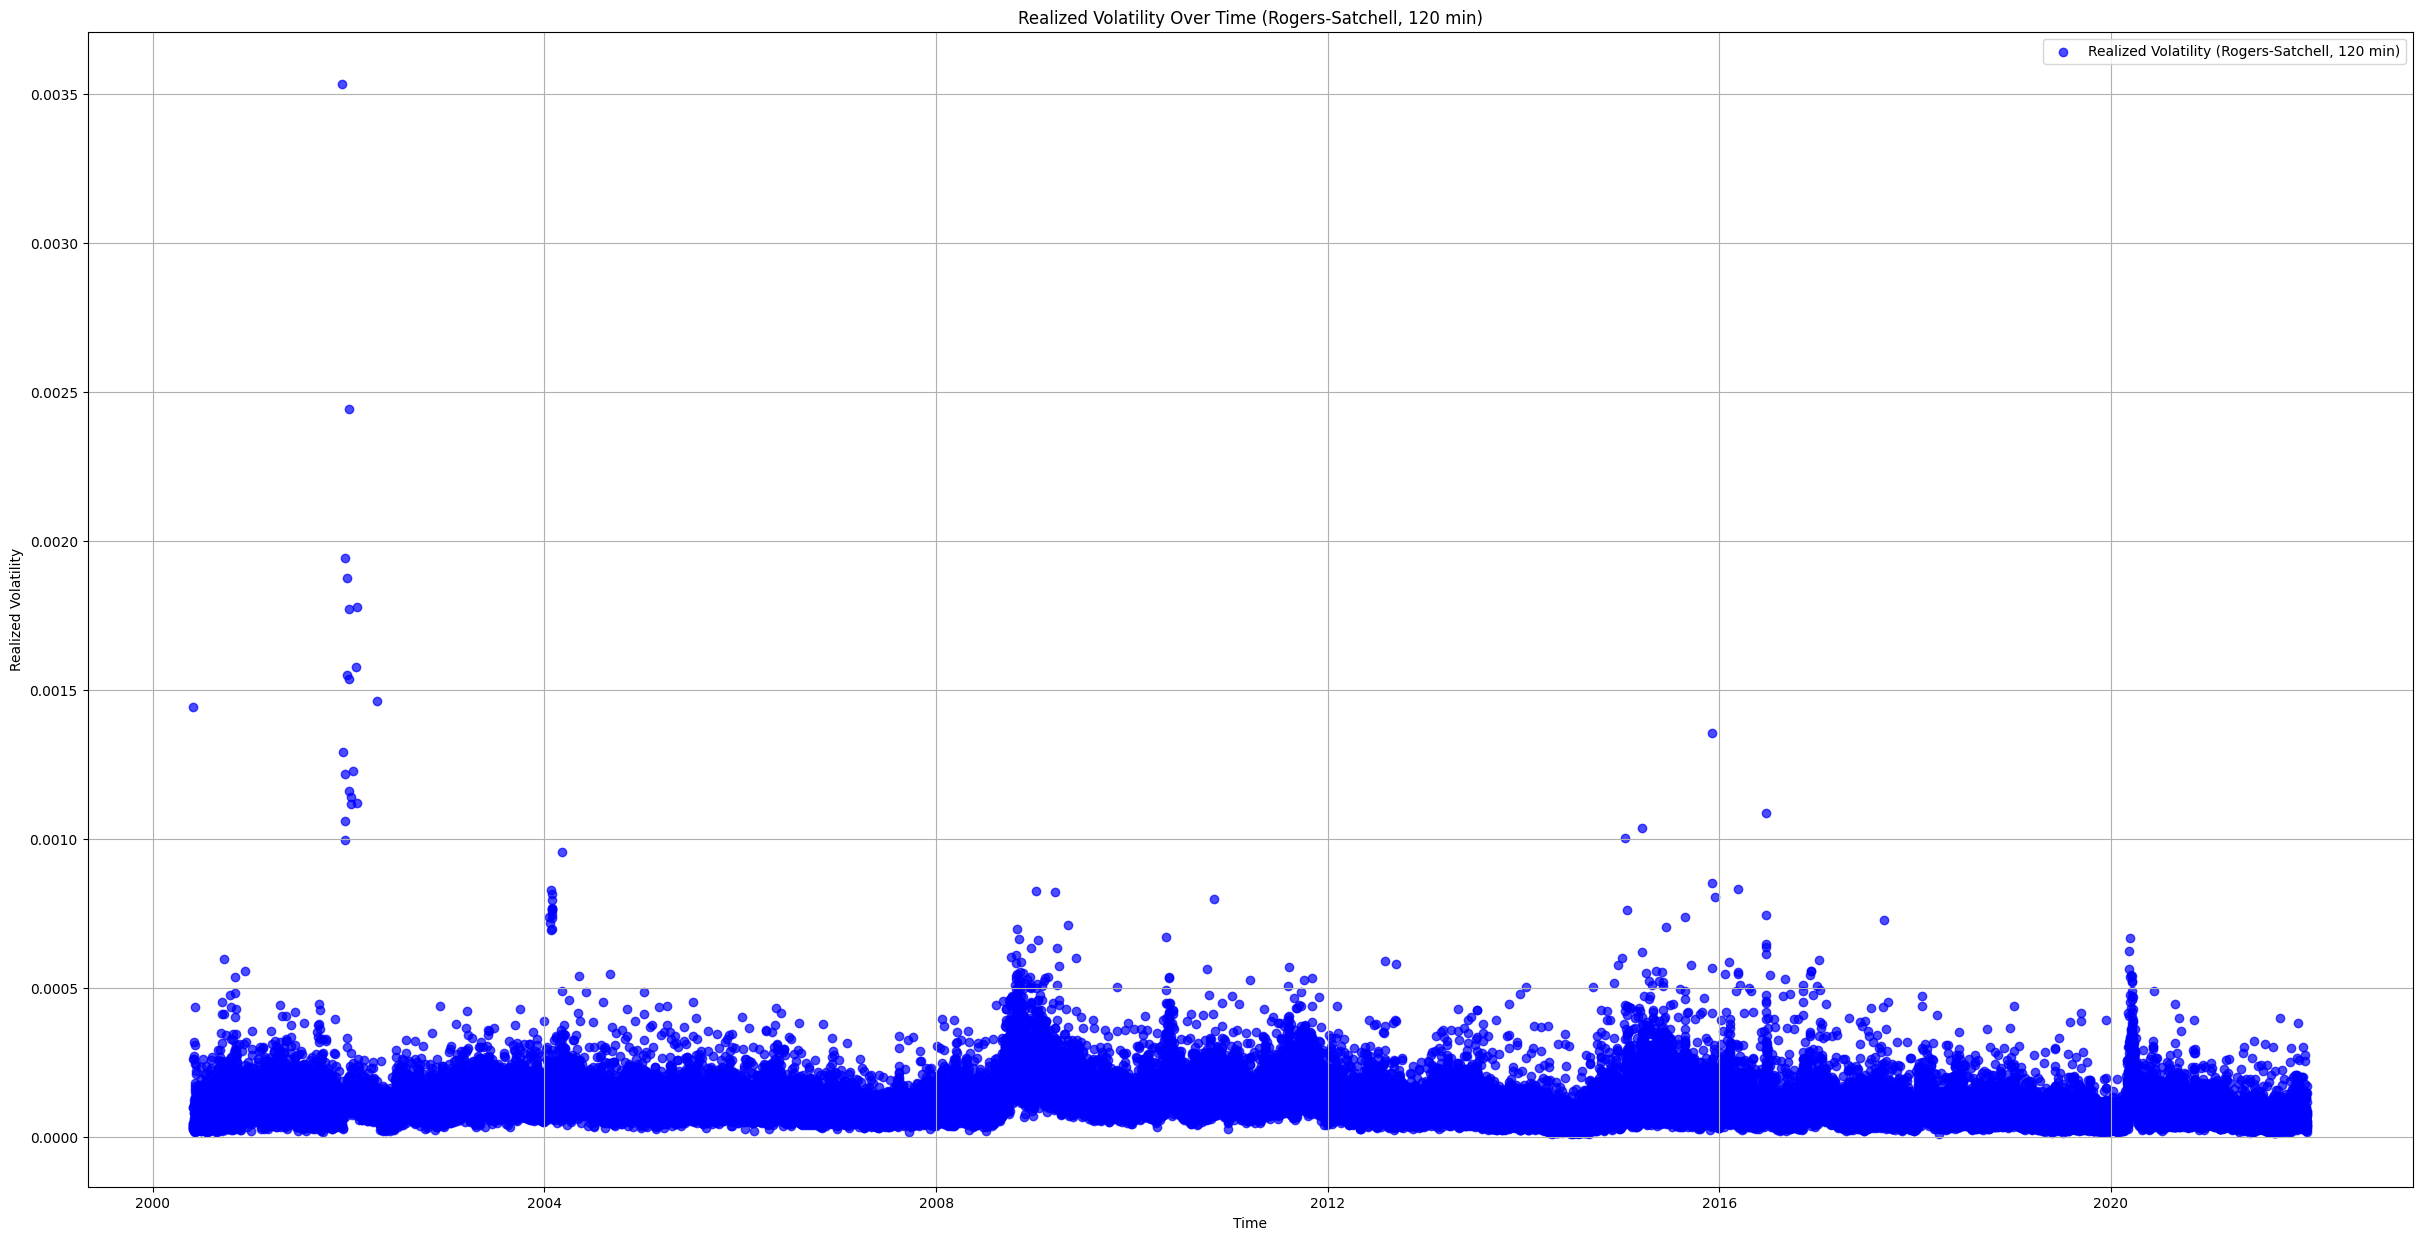

In [71]:
RS_120m_rvol = Prepare_data_calc_rvol(data, vol_measure = 'Rogers-Satchell', timeframe = 120, minute_interval = 1, threshold = 0.1)

In [72]:
#RS_120_missing_data, data, RS_120m_rvol = Prepare_data_calc_rvol(data, vol_measure = 'Rogers-Satchell', timeframe = 120, minute_interval = 1, threshold = 0.1)  # Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'

In [73]:
RS_120m_rvol.shape

(66681, 1)

In [74]:
RS_120m_rvol.isna().sum()

RVol_120min_Rogers-Satchell    0
dtype: int64

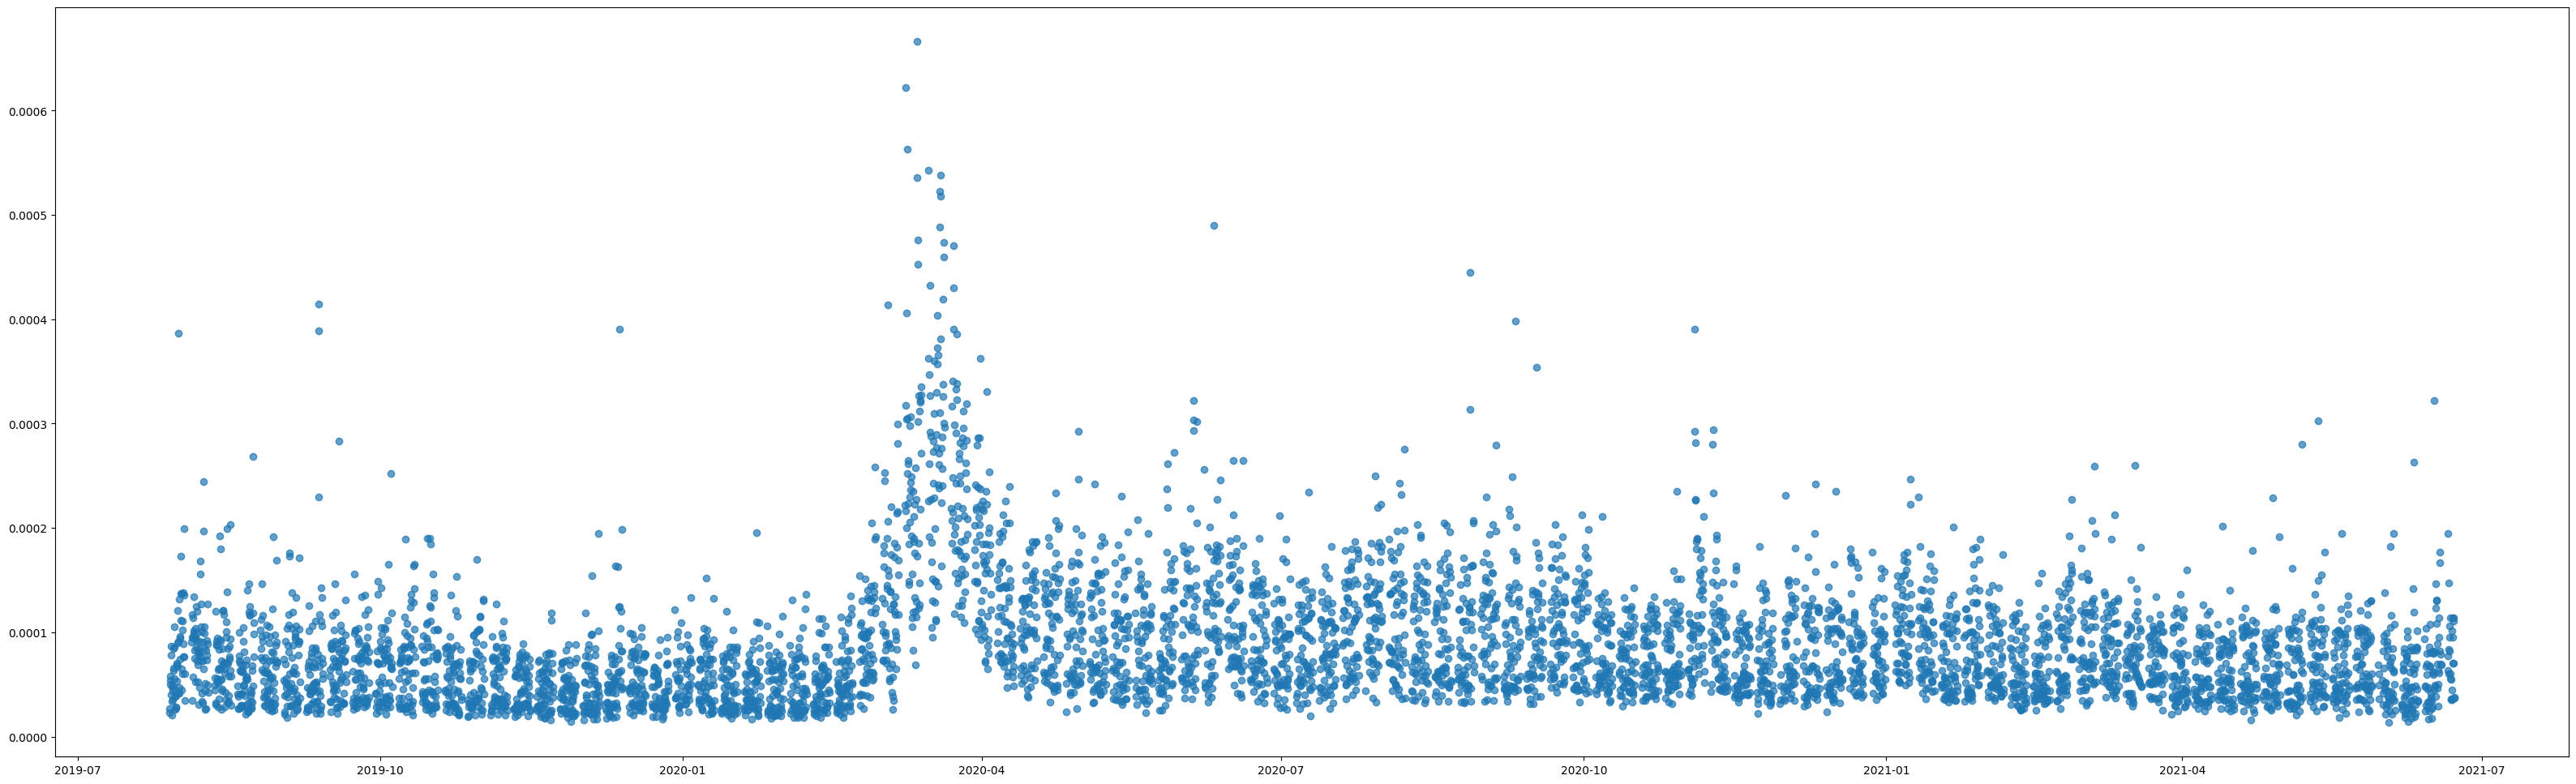

In [75]:
sample = RS_120m_rvol[59000:65000].dropna()

plt.figure(figsize = (40,12))
plt.scatter(sample.index , sample, alpha = 0.7)

C:\Users\estifo\AppData\Local\Temp\ipykernel_31488\3707363169.py:25: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ohlc_data = data.resample(resample_str).agg({
C:\Users\estifo\AppData\Local\Temp\ipykernel_31488\3707363169.py:36: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  grouped_counts = ohlc_data.resample(f'{timeframe}T').size()  # Actual data points per group
C:\Users\estifo\AppData\Local\Temp\ipykernel_31488\1876677554.py:46: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  period_counts = ohlc_data.resample(resample_str_timeframe).size()  # Count of data points per timeframe
C:\Users\estifo\AppData\Local\Temp\ipykernel_31488\1876677554.py:47: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  rvol_data = ohlc_data.resample(resample_str_timeframe).agg({'V': 'sum'})


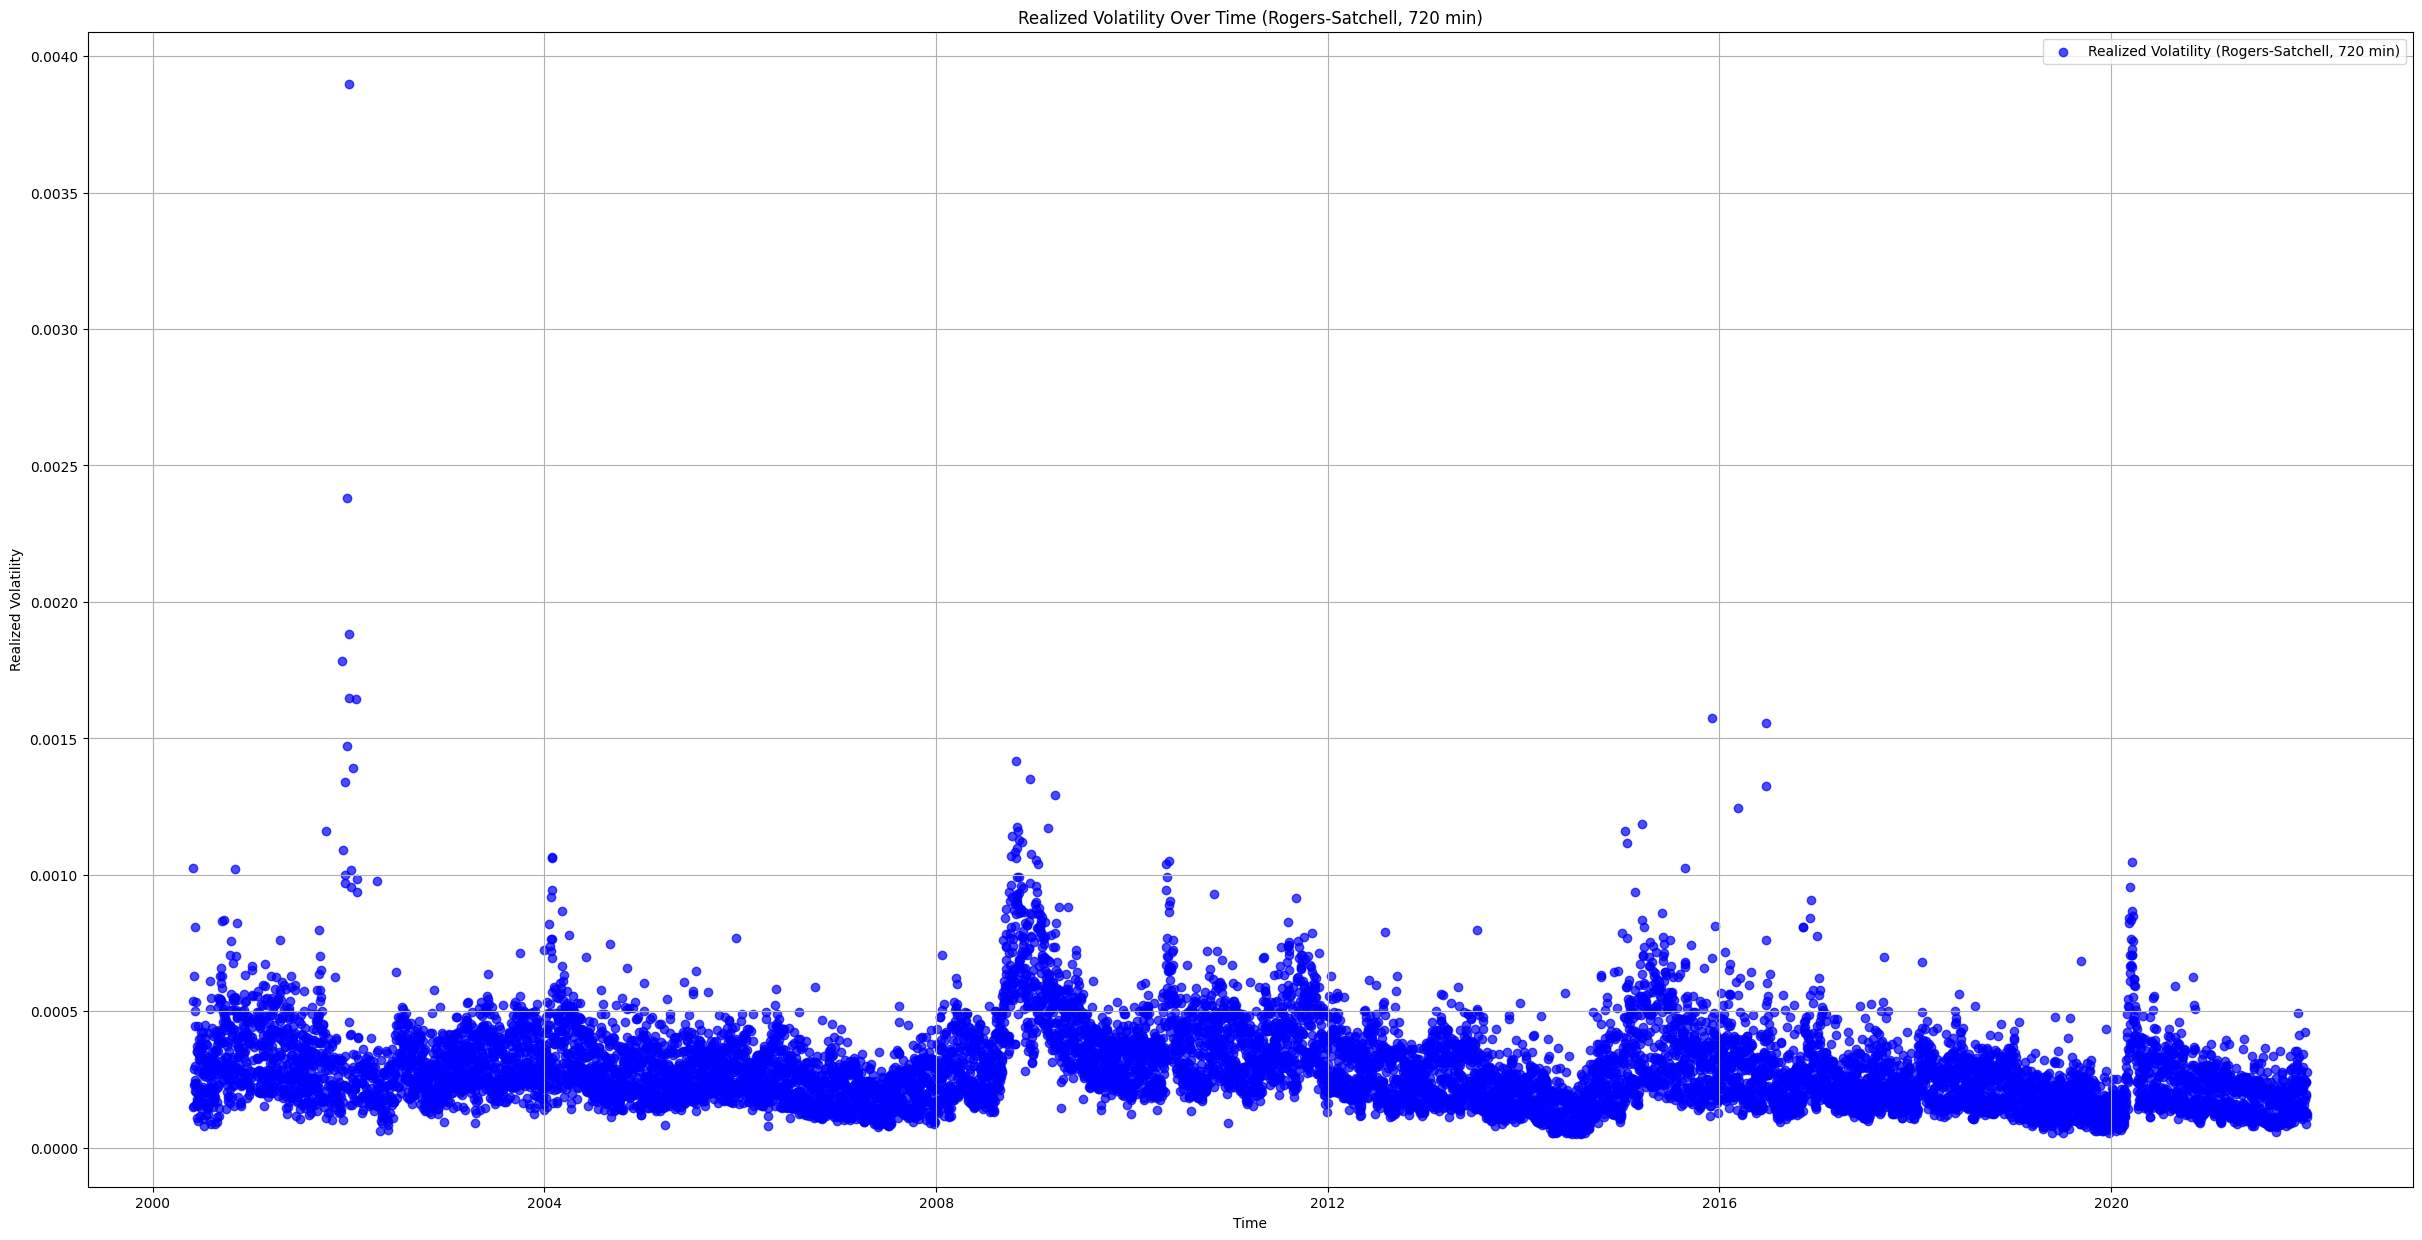

In [76]:
'''RS_720_missing_data, data,'''
RS_720m_rvol = Prepare_data_calc_rvol(data, vol_measure = 'Rogers-Satchell', timeframe = 720, minute_interval = 5, threshold = 0.2)  # Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'

In [77]:
RS_720m_rvol.describe()

,RVol_720min_Rogers-Satchell
count,12120.000000
mean,0.000291
std,0.000156
min,0.000050
25%,0.000186
50%,0.000259
75%,0.000360
max,0.003897


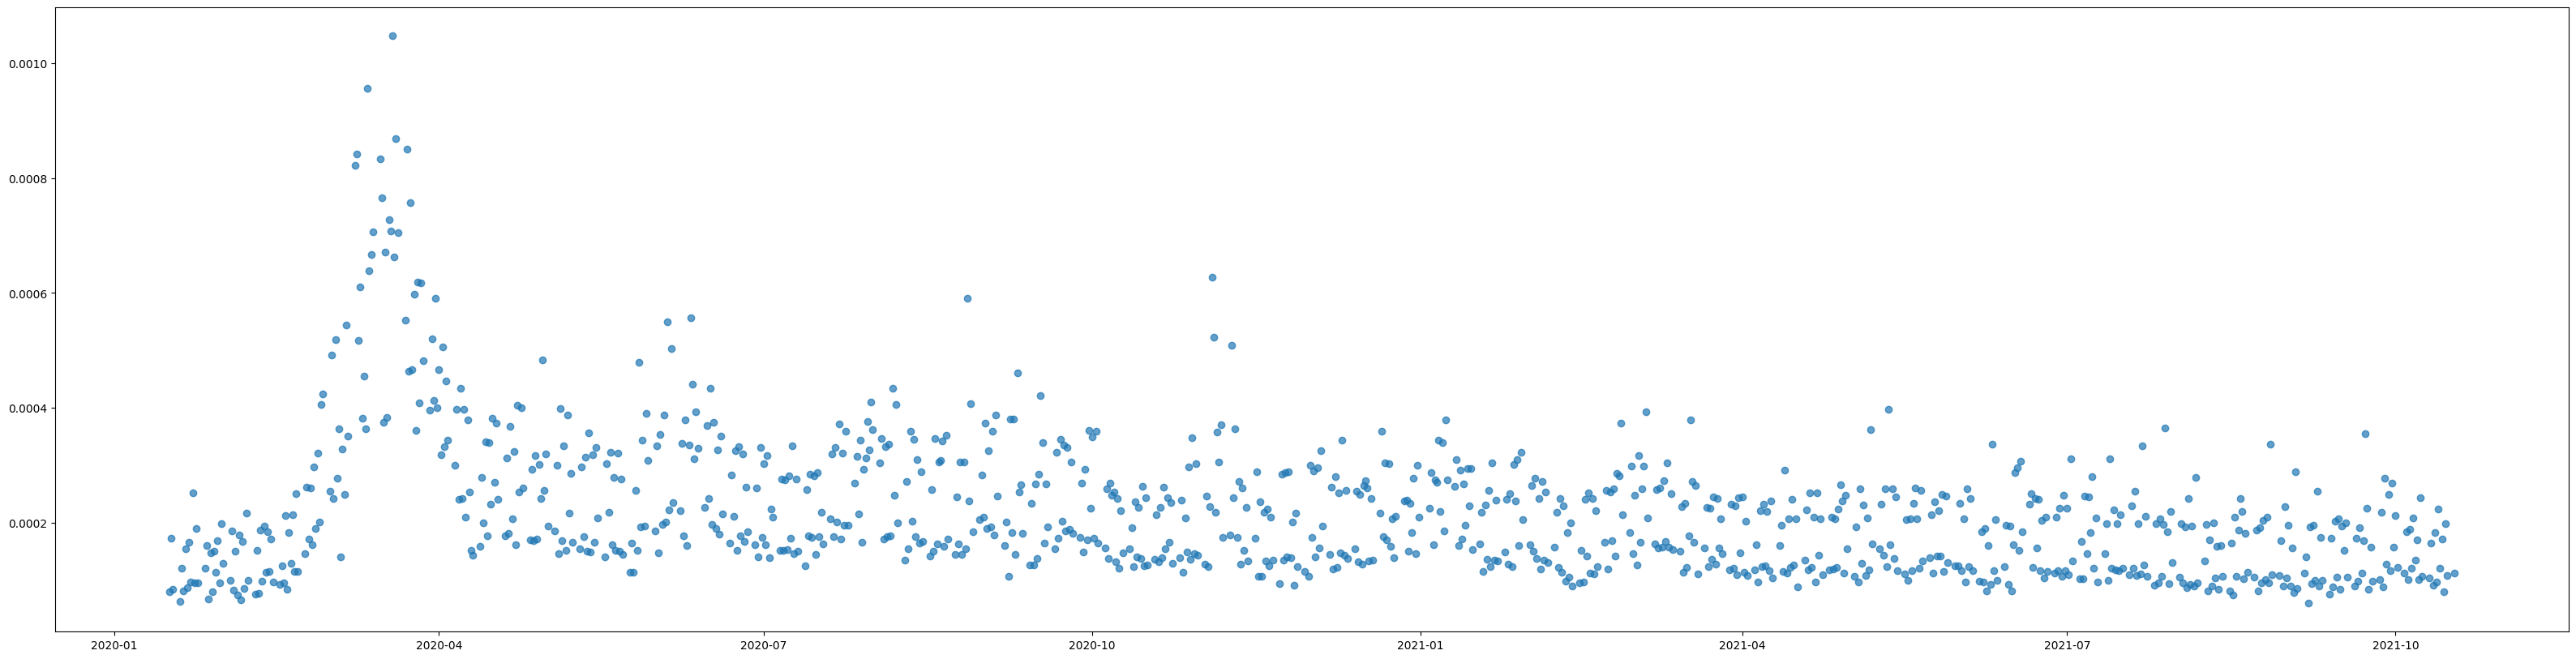

In [78]:
sample_720 = RS_720m_rvol.iloc[11000:12000]
plt.figure(figsize=(40, 10))
plt.scatter(sample_720.index, sample_720.values, alpha=0.7)

In [79]:
#RS_720_missing_data, data, RS_720m_rvol = Prepare_data_calc_rvol(data, vol_measure = 'Rogers-Satchell', timeframe = 720, minute_interval = 5, threshold = 0.1)

C:\Users\estifo\AppData\Local\Temp\ipykernel_31488\3707363169.py:25: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ohlc_data = data.resample(resample_str).agg({
C:\Users\estifo\AppData\Local\Temp\ipykernel_31488\3707363169.py:36: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  grouped_counts = ohlc_data.resample(f'{timeframe}T').size()  # Actual data points per group
C:\Users\estifo\AppData\Local\Temp\ipykernel_31488\1876677554.py:46: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  period_counts = ohlc_data.resample(resample_str_timeframe).size()  # Count of data points per timeframe
C:\Users\estifo\AppData\Local\Temp\ipykernel_31488\1876677554.py:47: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  rvol_data = ohlc_data.resample(resample_str_timeframe).agg({'V': 'sum'})


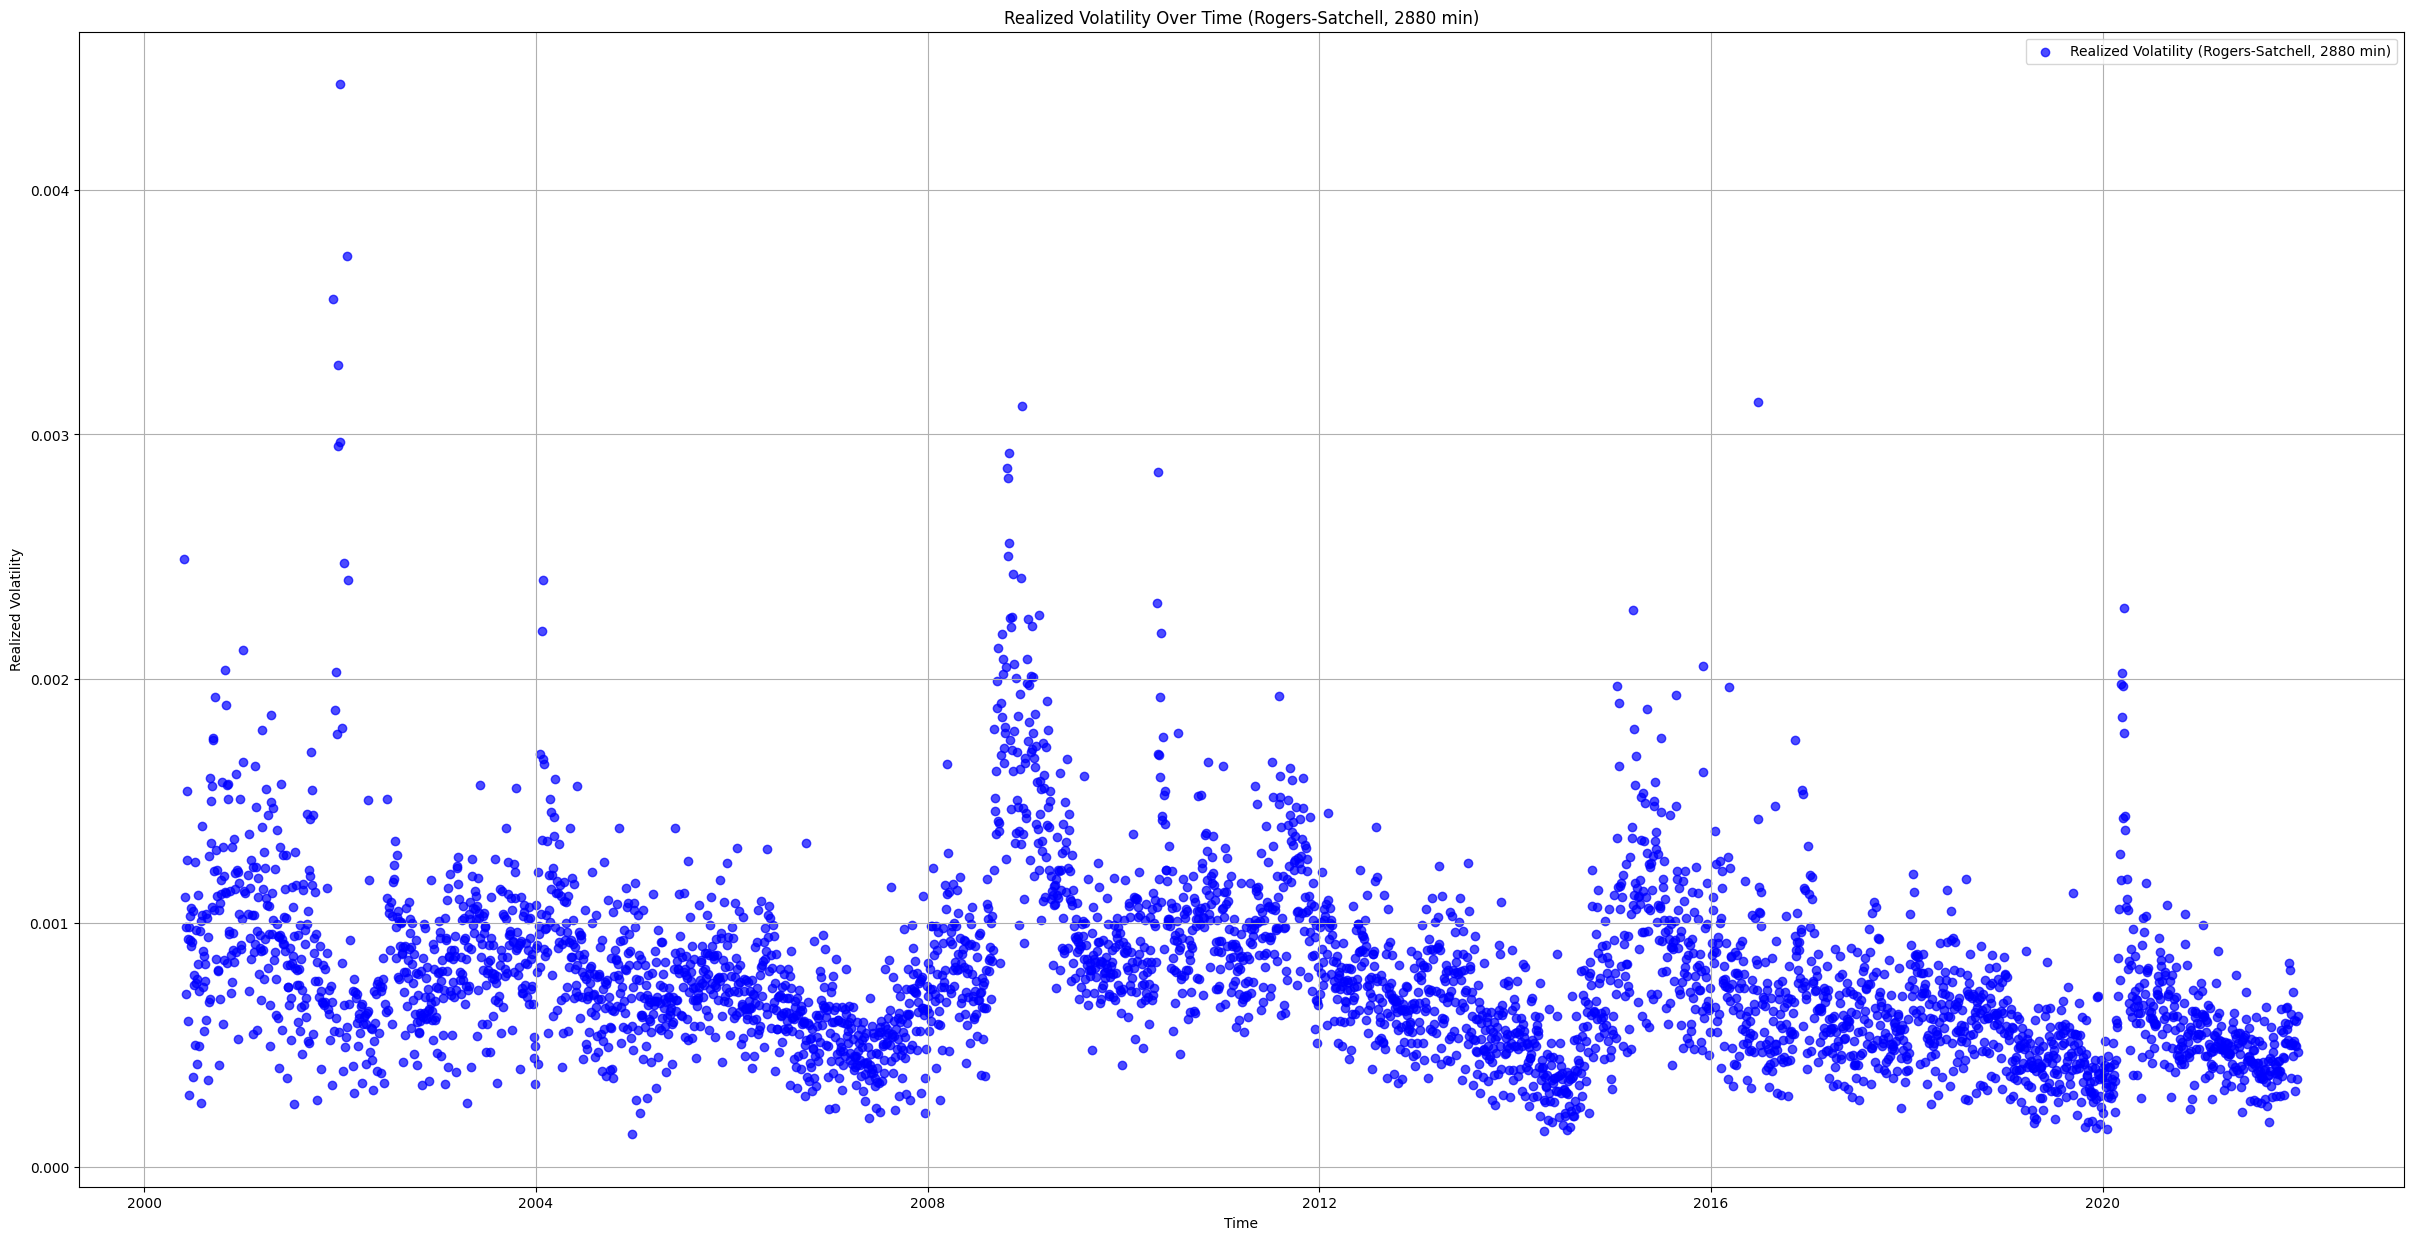

In [80]:
#RS_2880_missing_data ,data, 
rvol_2880m_rs = Prepare_data_calc_rvol(data, vol_measure='Rogers-Satchell', timeframe=2880, minute_interval= 30, threshold=0.2) # Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'

In [81]:
rvol_2880m_rs.describe()

,RVol_2880min_Rogers-Satchell
count,3881.000000
mean,0.000785
std,0.000368
min,0.000133
25%,0.000543
50%,0.000721
75%,0.000941
max,0.004435


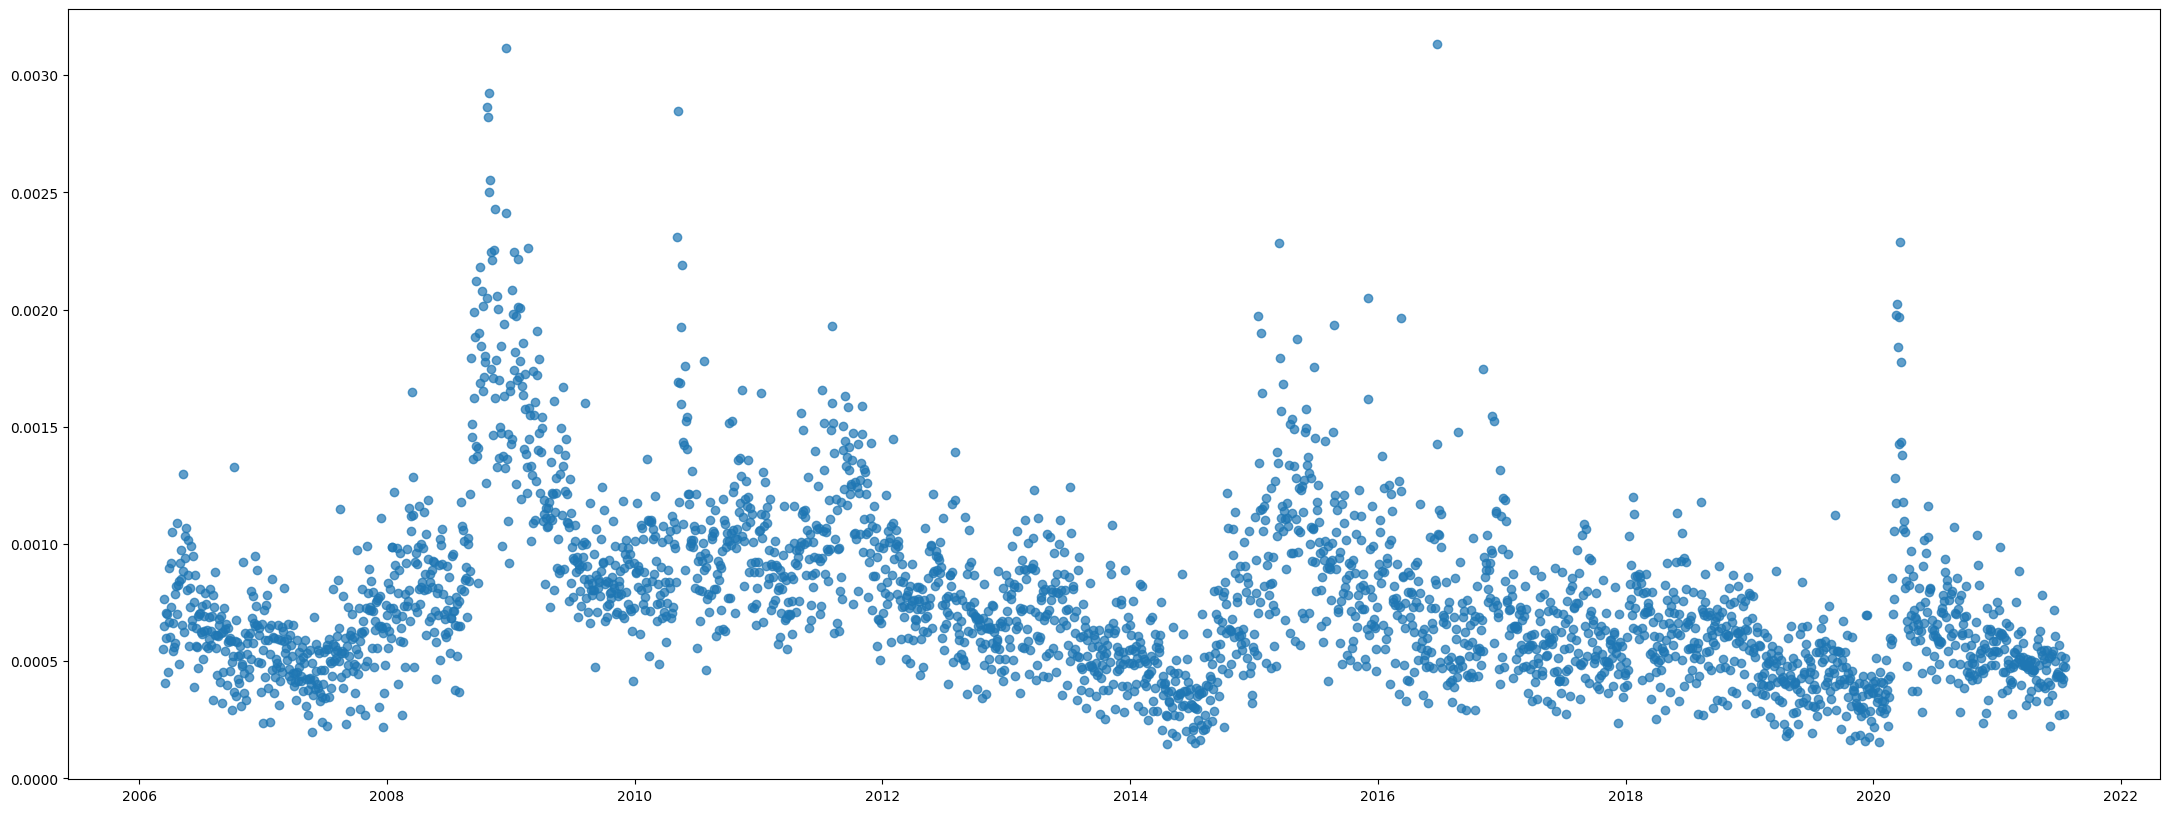

In [82]:
sample_2880 = rvol_2880m_rs.iloc[1000:3800]

plt.figure(figsize=(27, 10))
plt.scatter(sample_2880.index, sample_2880.values, alpha=0.7)

In [83]:
RS_120m_rvol.isna().sum()

RVol_120min_Rogers-Satchell    0
dtype: int64

In [84]:
def plot_rvol_histogram(rvol_data, title='Realized Volatility Histogram', bins=100):
    """
    Plots a histogram of realized volatility values.

    Parameters:
    - rvol_data (pd.Series or pd.DataFrame): The realized volatility data.
    - title (str): The title of the plot.
    - bins (int): Number of histogram bins.
    """

    # If DataFrame, extract the first column
    if isinstance(rvol_data, pd.DataFrame):
        rvol_data = rvol_data.iloc[:, 0]

    # Drop NaN values
    #rvol_data = rvol_data.dropna()

    # Drop NaN and inf/-inf
    rvol_data = rvol_data.replace([np.inf, -np.inf], np.nan).dropna()

    # Plot
    plt.figure(figsize=(10, 6))
    plt.hist(rvol_data, bins=bins, edgecolor='k', alpha=0.7)

    # Mean line
    mean_val = rvol_data.mean()
    plt.axvline(x=mean_val, color='green', linestyle='--', label=f'Mean: {mean_val:.4f}')

    # Labels and title
    plt.title(title)
    plt.xlabel('Realized Volatility')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()


In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

def plot_rvol_r2(rvol_series, title='Predicted vs Actual Realized Volatility'):
    """
    Uses the previous rVol value as the prediction and plots R² between predicted and actual rVol.

    Parameters:
    - rvol_series (pd.Series): A time series of realized volatility values.
    - title (str): Title of the plot.
    """

    # Clean the series: remove inf and NaN
    rvol_series = rvol_series.replace([np.inf, -np.inf], np.nan).dropna()

    # Use lag-1 as prediction
    rvol_pred = rvol_series.shift(1).dropna()
    rvol_actual = rvol_series.iloc[1:]

    # Align indices
    rvol_pred = rvol_pred.loc[rvol_actual.index]

    # Final clean: ensure both have no inf or NaN
    mask = (~rvol_actual.isna()) & (~rvol_pred.isna()) & \
           (~np.isinf(rvol_actual)) & (~np.isinf(rvol_pred))
    rvol_actual = rvol_actual[mask]
    rvol_pred = rvol_pred[mask]

    # Check if there is enough data
    if len(rvol_actual) < 2:
        print("Not enough valid data to calculate R².")
        return None

    # R² Score
    r2 = r2_score(rvol_actual, rvol_pred)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(rvol_actual, rvol_pred, alpha=0.5)
    plt.xlabel('Actual rVol')
    plt.ylabel('Predicted rVol (Previous Value)')
    plt.title(f'{title}\n$R^2$ = {r2:.4f}')
    plt.grid(True)
    plt.show()

    return r2



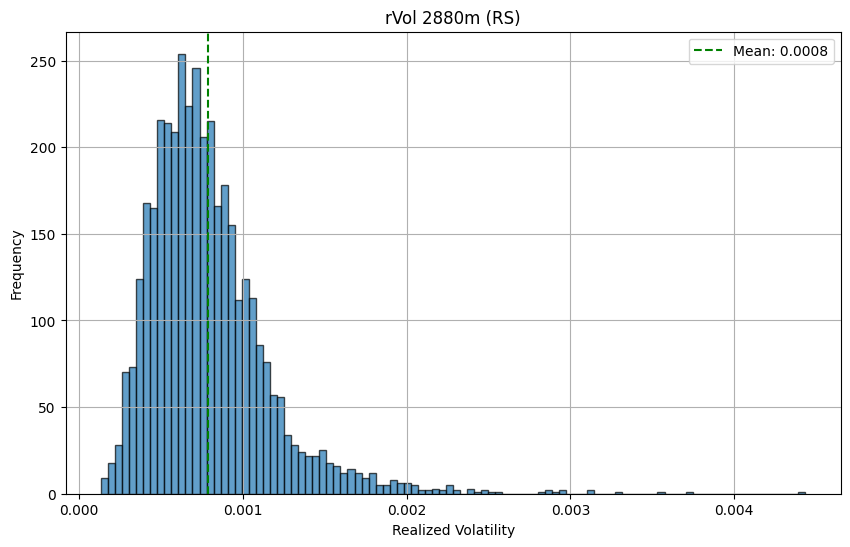

In [86]:
plot_rvol_histogram(rvol_2880m_rs, title='rVol 2880m (RS)', bins=100)


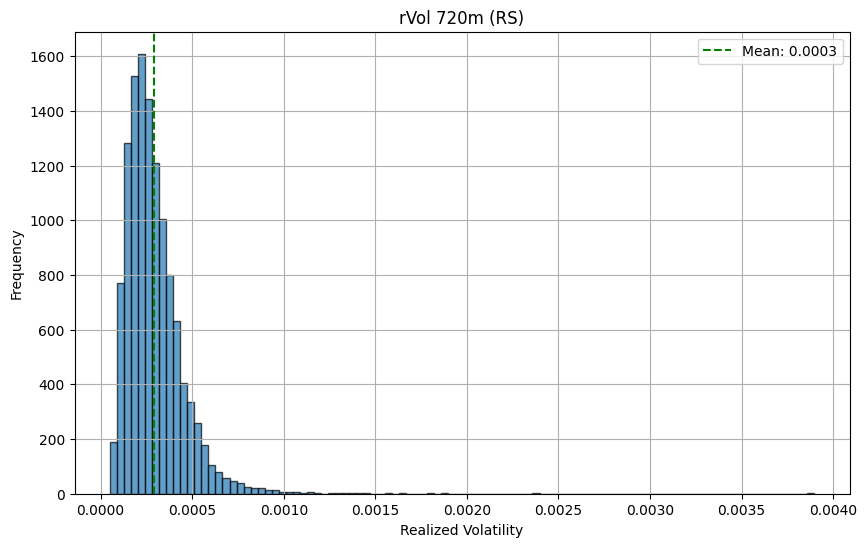

In [87]:
plot_rvol_histogram(RS_720m_rvol, title='rVol 720m (RS)', bins=100)

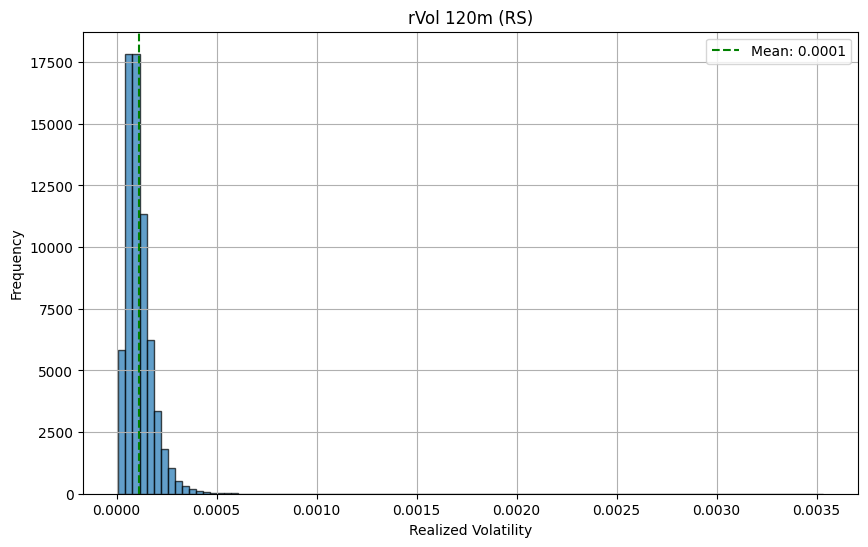

In [88]:
plot_rvol_histogram(RS_120m_rvol, title='rVol 120m (RS)', bins=100)

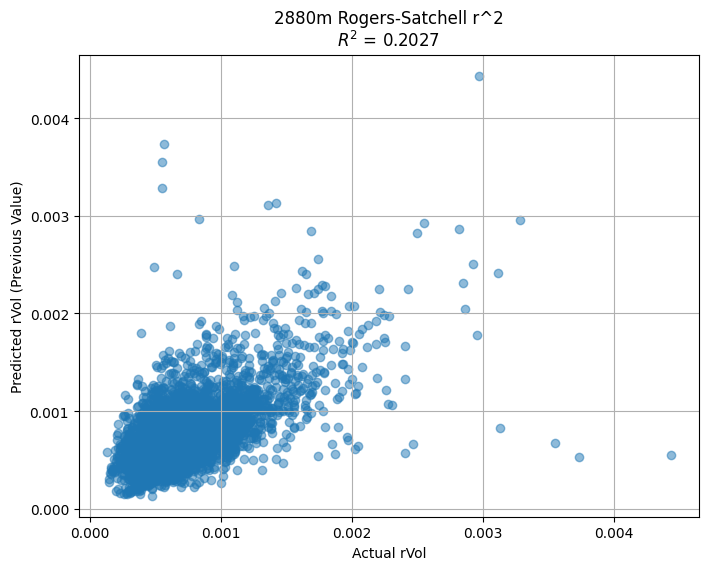

0.2027421662570814

In [89]:
plot_rvol_r2(rvol_2880m_rs, title='2880m Rogers-Satchell r^2')


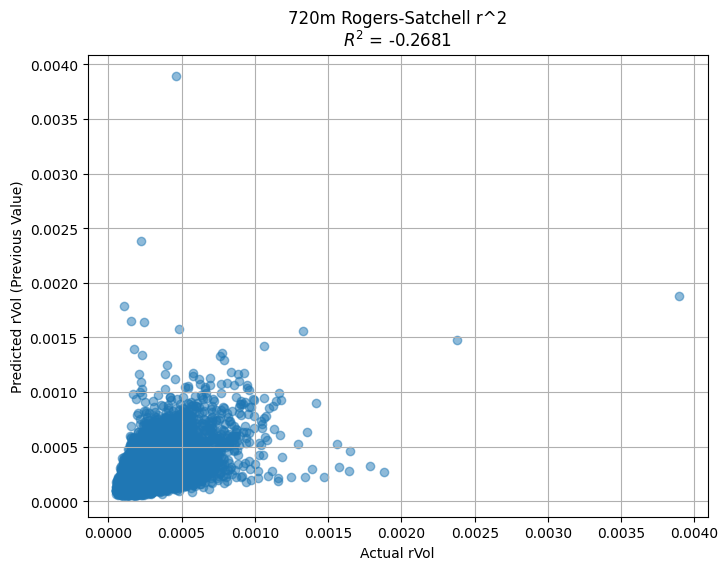

-0.26814172570462147

In [90]:
plot_rvol_r2(RS_720m_rvol, title='720m Rogers-Satchell r^2')


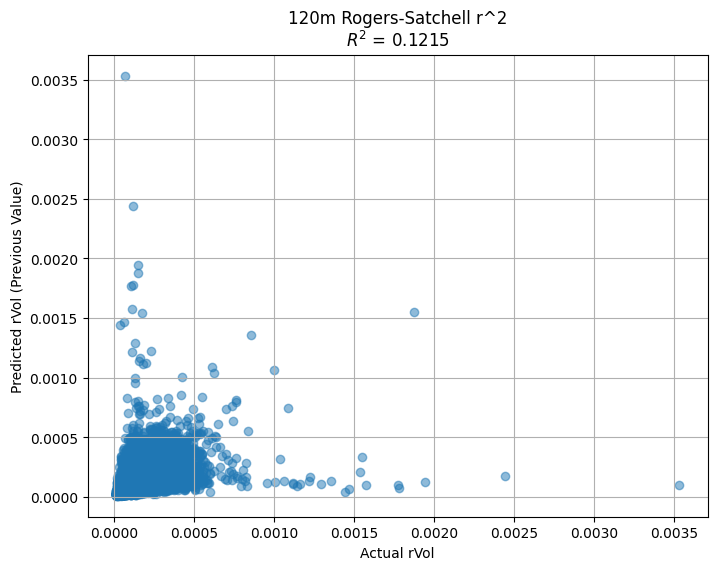

0.12150084372886116

In [91]:
plot_rvol_r2(RS_120m_rvol, title='120m Rogers-Satchell r^2')